# Project : Climate Change through Temperature Change

## Problem Statement

The Food and Agriculture Organization of the United Nations is a specialized agency of the United Nations that leads international efforts to defeat hunger and improve nutrition and food security. 
Increases in surface air temperature associated with rising greenhouse gas concentrations threaten plant growth and yield, putting millions of farmers and communities at risk throughout the world. 
Together with changes in precipitation and increases in extreme events such as flooding and droughts, climate change threatens countries’ food security, and their ability to eradicate poverty and achieve sustainable development. 

This project will  focus on building a Time series model that will predict and forecast the Temperature change  for the next 15 years  using a dataset from FAOSTAT on temperature change .
This model  will shows  the trends and will allow an understanding  of impacts of climate change challenges on Agriculture.


## Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The dataset is a combination of a dataset of temperature change from  Kaggle (https://www.kaggle.com/sevgisarac/temperature-change) and a dataset of countries with regional codes from (https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv).


The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2020. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS).

Content
Statistical concepts and definitions

Statistical standards: Data in the Temperature Change domain are not an explicit SEEA variable. Nonetheless, country and regional calculations employ a definition of “Land area” consistent with SEEA Land Use definitions, specifically SEEA CF Table 5.11 “Land Use Classification” and SEEA AFF Table 4.8, “Physical asset account for land use.” The Temperature Change domain of the FAOSTAT Agri-Environmental Indicators section is compliant with the Framework for the Development of Environmental Statistics (FDES 2013), contributing to FDES Component 1: Environmental Conditions and Quality, Sub-component 1.1: Physical Conditions, Topic 1.1.1: Atmosphere, climate and weather, Core set/ Tier 1 statistics a.1.

Statistical unit: Countries and Territories.

Statistical population: Countries and Territories.

Reference area: Area of all the Countries and Territories of the world. In 2019: 190 countries and 37 other territorial entities.

Code - reference area: FAOSTAT, M49, ISO2 and ISO3 (http://www.fao.org/faostat/en/#definitions). FAO Global Administrative Unit Layer (GAUL National level – reference year 2014. FAO Geospatial data repository GeoNetwork. Permanent address: http://www.fao.org:80/geonetwork?uuid=f7e7adb0-88fd-11da-a88f-000d939bc5d8.

Code - Number of countries/areas covered: In 2019: 190 countries and 37 other territorial entities.

Time coverage: 1961-2020

Periodicity: Monthly, Seasonal, Yearly

Base period: 1951-1980

Unit of Measure: Celsius degrees °C

Reference period: Months, Seasons, Meteorological year

Region  of countries and territories

Subregion of countries and territories



## Data Import and Cleaning

In this part, we will import the datasets from the .csv files.From the Temperature Change dataset , We did some cleaning and removed the data from 3 months period and meteorological year so that we can have the data for every month. 

Next, we looked at the missing values in the columns of months and values had missing values. we decided to remove the row without the months and where the value is missing replace it with 0. We combine the month and year columns to create a new column date.

After the cleaning process, we removed the unnecessary columns and combine the new data frame with the dataset that has region and subregion to a single data frame. We saved the Data frame to a new .csv file.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [2]:
### Importing the dataset from a .csv file
data = pd.read_csv('./data/dataproject5.csv')
data.head()

Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperature change                2  Afghanistan          7271   
1          ET  Temperature change                2  Afghanistan          7271   
2          ET  Temperature change                2  Afghanistan          7271   
3          ET  Temperature change                2  Afghanistan          7271   
4          ET  Temperature change                2  Afghanistan          7271   

              Element  Months Code   Months  Year Code  Year Unit  Value Flag  \
0  Temperature change         7001  January       1961  1961   ?C  0.746   Fc   
1  Temperature change         7001  January       1962  1962   ?C  0.009   Fc   
2  Temperature change         7001  January       1963  1963   ?C  2.695   Fc   
3  Temperature change         7001  January       1964  1964   ?C -5.277   Fc   
4  Temperature change         7001  January       1965  1965   ?C  1.827   Fc   

  Flag Description  
0  Calculated data  
1  Calculated data  
2  Calculated data  
3  Calculated data  
4  Calculated data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229925 entries, 0 to 229924
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       229925 non-null  object 
 1   Domain            229925 non-null  object 
 2   Area Code (FAO)   229925 non-null  int64  
 3   Area              229925 non-null  object 
 4   Element Code      229925 non-null  int64  
 5   Element           229925 non-null  object 
 6   Months Code       229925 non-null  int64  
 7   Months            229925 non-null  object 
 8   Year Code         229925 non-null  int64  
 9   Year              229925 non-null  int64  
 10  Unit              229925 non-null  object 
 11  Value             222012 non-null  float64
 12  Flag              229925 non-null  object 
 13  Flag Description  229925 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 24.6+ MB


In [4]:
#renaming the columns to lower case 
data = data.rename(columns=lambda s: s.replace(' ','_').lower())


In [5]:
# a statistical summary of the dataset 
data.describe(include='all')

domain_code              domain  area_code_(fao)    area  element_code  \
count       229925              229925    229925.000000  229925      229925.0   
unique           1                   1              NaN     247           NaN   
top             ET  Temperature change              NaN  Sweden           NaN   
freq        229925              229925              NaN    1020           NaN   
mean           NaN                 NaN       130.647689     NaN        7271.0   
std            NaN                 NaN        76.809008     NaN           0.0   
min            NaN                 NaN         1.000000     NaN        7271.0   
25%            NaN                 NaN        64.000000     NaN        7271.0   
50%            NaN                 NaN       131.000000     NaN        7271.0   
75%            NaN                 NaN       194.000000     NaN        7271.0   
max            NaN                 NaN       351.000000     NaN        7271.0   

                   element    months_code    months      year_code  \
count               229925  229925.000000    229925  229925.000000   
unique                   1            NaN        17            NaN   
top     Temperature change            NaN  November            NaN   
freq                229925            NaN     13525            NaN   
mean                   NaN    7009.882353       NaN    1991.306248   
std                    NaN       6.037955       NaN      17.333252   
min                    NaN    7001.000000       NaN    1961.000000   
25%                    NaN    7005.000000       NaN    1976.000000   
50%                    NaN    7009.000000       NaN    1992.000000   
75%                    NaN    7016.000000       NaN    2006.000000   
max                    NaN    7020.000000       NaN    2020.000000   

                 year    unit          value    flag flag_description  
count   229925.000000  229925  222012.000000  229925           229925  
unique            NaN       1            NaN       2                2  
top               NaN      ?C            NaN      Fc  Calculated data  
freq              NaN  229925            NaN  222012           222012  
mean      1991.306248     NaN       0.492626     NaN              NaN  
std         17.333252     NaN       1.036364     NaN              NaN  
min       1961.000000     NaN      -9.303000     NaN              NaN  
25%       1976.000000     NaN      -0.071000     NaN              NaN  
50%       1992.000000     NaN       0.414000     NaN              NaN  
75%       2006.000000     NaN       0.999000     NaN              NaN  
max       2020.000000     NaN      11.759000     NaN              NaN

In [6]:
###looking at the count of the unique value of the months column
data['months'].value_counts()

November               13525
September              13525
May                    13525
Mar?Apr?May            13525
Jun?Jul?Aug            13525
August                 13525
Dec?Jan?Feb            13525
March                  13525
Sep?Oct?Nov            13525
June                   13525
April                  13525
January                13525
October                13525
February               13525
December               13525
July                   13525
Meteorological year    13525
Name: months, dtype: int64

In [7]:
data['months'].loc[data['months'].isin(['Sep?Oct?Nov','Meteorological year','Mar?Apr?May','Dec?Jan?Feb','Jun?Jul?Aug'])]

720               Dec?Jan?Feb
721               Dec?Jan?Feb
722               Dec?Jan?Feb
723               Dec?Jan?Feb
724               Dec?Jan?Feb
                 ...         
229920    Meteorological year
229921    Meteorological year
229922    Meteorological year
229923    Meteorological year
229924    Meteorological year
Name: months, Length: 67625, dtype: object

In [8]:
#We are removing from the months , the 3 months aggregation and meteorological year.

data['months'] = data['months'].loc[~data['months'].isin(['Sep?Oct?Nov','Meteorological year','Mar?Apr?May','Dec?Jan?Feb','Jun?Jul?Aug'])]

In [9]:
data['months'].value_counts()

November     13525
June         13525
July         13525
December     13525
February     13525
October      13525
January      13525
April        13525
September    13525
March        13525
August       13525
May          13525
Name: months, dtype: int64

In [10]:
## looking at null values in the dataset
data.isnull().sum()

domain_code             0
domain                  0
area_code_(fao)         0
area                    0
element_code            0
element                 0
months_code             0
months              67625
year_code               0
year                    0
unit                    0
value                7913
flag                    0
flag_description        0
dtype: int64

In [11]:
data.shape

(229925, 14)

In [12]:
data.loc[data['months'].isnull()]

domain_code              domain  area_code_(fao)         area  \
720             ET  Temperature change                2  Afghanistan   
721             ET  Temperature change                2  Afghanistan   
722             ET  Temperature change                2  Afghanistan   
723             ET  Temperature change                2  Afghanistan   
724             ET  Temperature change                2  Afghanistan   
...            ...                 ...              ...          ...   
229920          ET  Temperature change              181     Zimbabwe   
229921          ET  Temperature change              181     Zimbabwe   
229922          ET  Temperature change              181     Zimbabwe   
229923          ET  Temperature change              181     Zimbabwe   
229924          ET  Temperature change              181     Zimbabwe   

        element_code             element  months_code months  year_code  year  \
720             7271  Temperature change         7016    NaN       1961  1961   
721             7271  Temperature change         7016    NaN       1962  1962   
722             7271  Temperature change         7016    NaN       1963  1963   
723             7271  Temperature change         7016    NaN       1964  1964   
724             7271  Temperature change         7016    NaN       1965  1965   
...              ...                 ...          ...    ...        ...   ...   
229920          7271  Temperature change         7020    NaN       2016  2016   
229921          7271  Temperature change         7020    NaN       2017  2017   
229922          7271  Temperature change         7020    NaN       2018  2018   
229923          7271  Temperature change         7020    NaN       2019  2019   
229924          7271  Temperature change         7020    NaN       2020  2020   

       unit  value flag flag_description  
720      ?C -0.751   Fc  Calculated data  
721      ?C  0.985   Fc  Calculated data  
722      ?C  1.931   Fc  Calculated data  
723      ?C -2.056   Fc  Calculated data  
724      ?C -0.669   Fc  Calculated data  
...     ...    ...  ...              ...  
229920   ?C  1.470   Fc  Calculated data  
229921   ?C  0.443   Fc  Calculated data  
229922   ?C  0.747   Fc  Calculated data  
229923   ?C  1.359   Fc  Calculated data  
229924   ?C  0.820   Fc  Calculated data  

[67625 rows x 14 columns]

In [13]:
data.loc[data['value'].isnull()]

domain_code              domain  area_code_(fao)            area  \
3097            ET  Temperature change                5  American Samoa   
3109            ET  Temperature change                5  American Samoa   
3157            ET  Temperature change                5  American Samoa   
3217            ET  Temperature change                5  American Samoa   
3276            ET  Temperature change                5  American Samoa   
...            ...                 ...              ...             ...   
227354          ET  Temperature change              249           Yemen   
227355          ET  Temperature change              249           Yemen   
227356          ET  Temperature change              249           Yemen   
227357          ET  Temperature change              249           Yemen   
227920          ET  Temperature change              251          Zambia   

        element_code             element  months_code    months  year_code  \
3097            7271  Temperature change         7001   January       1998   
3109            7271  Temperature change         7001   January       2010   
3157            7271  Temperature change         7002  February       1998   
3217            7271  Temperature change         7003     March       1998   
3276            7271  Temperature change         7004     April       1997   
...              ...                 ...          ...       ...        ...   
227354          7271  Temperature change         7020       NaN       2017   
227355          7271  Temperature change         7020       NaN       2018   
227356          7271  Temperature change         7020       NaN       2019   
227357          7271  Temperature change         7020       NaN       2020   
227920          7271  Temperature change         7001   January       1996   

        year unit  value flag    flag_description  
3097    1998   ?C    NaN   NV  Data not available  
3109    2010   ?C    NaN   NV  Data not available  
3157    1998   ?C    NaN   NV  Data not available  
3217    1998   ?C    NaN   NV  Data not available  
3276    1997   ?C    NaN   NV  Data not available  
...      ...  ...    ...  ...                 ...  
227354  2017   ?C    NaN   NV  Data not available  
227355  2018   ?C    NaN   NV  Data not available  
227356  2019   ?C    NaN   NV  Data not available  
227357  2020   ?C    NaN   NV  Data not available  
227920  1996   ?C    NaN   NV  Data not available  

[7913 rows x 14 columns]

In [14]:
data.loc[(data['value'].isnull()) & (data['area'] == 'American Samoa')]

domain_code              domain  area_code_(fao)            area  \
3097          ET  Temperature change                5  American Samoa   
3109          ET  Temperature change                5  American Samoa   
3157          ET  Temperature change                5  American Samoa   
3217          ET  Temperature change                5  American Samoa   
3276          ET  Temperature change                5  American Samoa   
3277          ET  Temperature change                5  American Samoa   
3336          ET  Temperature change                5  American Samoa   
3337          ET  Temperature change                5  American Samoa   
3348          ET  Temperature change                5  American Samoa   
3396          ET  Temperature change                5  American Samoa   
3397          ET  Temperature change                5  American Samoa   
3456          ET  Temperature change                5  American Samoa   
3457          ET  Temperature change                5  American Samoa   
3468          ET  Temperature change                5  American Samoa   
3516          ET  Temperature change                5  American Samoa   
3517          ET  Temperature change                5  American Samoa   
3528          ET  Temperature change                5  American Samoa   
3576          ET  Temperature change                5  American Samoa   
3577          ET  Temperature change                5  American Samoa   
3588          ET  Temperature change                5  American Samoa   
3636          ET  Temperature change                5  American Samoa   
3637          ET  Temperature change                5  American Samoa   
3648          ET  Temperature change                5  American Samoa   
3696          ET  Temperature change                5  American Samoa   
3697          ET  Temperature change                5  American Samoa   
3708          ET  Temperature change                5  American Samoa   
3756          ET  Temperature change                5  American Samoa   
3768          ET  Temperature change                5  American Samoa   
3817          ET  Temperature change                5  American Samoa   
3829          ET  Temperature change                5  American Samoa   
3876          ET  Temperature change                5  American Samoa   
3877          ET  Temperature change                5  American Samoa   
3936          ET  Temperature change                5  American Samoa   
3937          ET  Temperature change                5  American Samoa   
3948          ET  Temperature change                5  American Samoa   
3996          ET  Temperature change                5  American Samoa   
3997          ET  Temperature change                5  American Samoa   
4008          ET  Temperature change                5  American Samoa   
4056          ET  Temperature change                5  American Samoa   
4057          ET  Temperature change                5  American Samoa   
4068          ET  Temperature change                5  American Samoa   

      element_code             element  months_code     months  year_code  \
3097          7271  Temperature change         7001    January       1998   
3109          7271  Temperature change         7001    January       2010   
3157          7271  Temperature change         7002   February       1998   
3217          7271  Temperature change         7003      March       1998   
3276          7271  Temperature change         7004      April       1997   
3277          7271  Temperature change         7004      April       1998   
3336          7271  Temperature change         7005        May       1997   
3337          7271  Temperature change         7005        May       1998   
3348          7271  Temperature change         7005        May       2009   
3396          7271  Temperature change         7006       June       1997   
3397          7271  Temperature change         7006       June       1998   
3456          

In [15]:
# we are going to drop the missing values from the months because they appear to be yearly aggregate 
data = data.dropna(subset=['months'])

In [16]:
data.isnull().sum()

domain_code            0
domain                 0
area_code_(fao)        0
area                   0
element_code           0
element                0
months_code            0
months                 0
year_code              0
year                   0
unit                   0
value               5619
flag                   0
flag_description       0
dtype: int64

In [17]:
# we have around 5000 missing values in 'value', we are assuming the value is equal to zero.
data['value'] = np.where(data['value'].isnull() == True,0 ,data['value'])

In [18]:
data.isnull().sum()

domain_code         0
domain              0
area_code_(fao)     0
area                0
element_code        0
element             0
months_code         0
months              0
year_code           0
year                0
unit                0
value               0
flag                0
flag_description    0
dtype: int64

In [19]:
data.shape

(162300, 14)

In [20]:
### Creating a date column
data['date'] = ''
for i in data.index:
    data['date'][i] = data['months'][i] + ' ' + str(data['year'][i])

<ipython-input-20-68954ed5e9f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'][i] = data['months'][i] + ' ' + str(data['year'][i])


In [21]:
### converting date column to datetime
data['date']= pd.to_datetime(data.date)

In [22]:
data.dtypes

domain_code                 object
domain                      object
area_code_(fao)              int64
area                        object
element_code                 int64
element                     object
months_code                  int64
months                      object
year_code                    int64
year                         int64
unit                        object
value                      float64
flag                        object
flag_description            object
date                datetime64[ns]
dtype: object

In [23]:
### removing  columns we don't want to use ### maybe we can create a copy of the dataset ?
data= data[['date','value','area_code_(fao)','area']]
data.head()

date  value  area_code_(fao)         area
0 1961-01-01  0.746                2  Afghanistan
1 1962-01-01  0.009                2  Afghanistan
2 1963-01-01  2.695                2  Afghanistan
3 1964-01-01 -5.277                2  Afghanistan
4 1965-01-01  1.827                2  Afghanistan

In [24]:
### Cleaning up country names with corrupt data

data['area'] = np.where(data['area'] == 'R?union','Réunion', data['area'])

data["area"] = np.where(data["area"] == "C?te d'Ivoire","Côte d'Ivoire", data["area"])

In [25]:
country_region = pd.read_csv('./data/Country_Regions.csv')

In [26]:
country_region.head(10)

country iso2 iso3      region                        subregion
0          Afghanistan   AF  AFG        Asia                    Southern Asia
1        Åland Islands   AX  ALA      Europe                  Northern Europe
2              Albania   AL  ALB      Europe                  Southern Europe
3              Algeria   DZ  DZA      Africa                  Northern Africa
4       American Samoa   AS  ASM     Oceania                        Polynesia
5              Andorra   AD  AND      Europe                  Southern Europe
6               Angola   AO  AGO      Africa               Sub-Saharan Africa
7             Anguilla   AI  AIA    Americas  Latin America and the Caribbean
8           Antarctica   AQ  ATA  Antarctica                       Antarctica
9  Antigua and Barbuda   AG  ATG    Americas  Latin America and the Caribbean

In [27]:
### creating a dictionary of countries with regions and subregions
region_dict = dict()
for i in country_region.index:
     region_dict[country_region['country'][i]] = (country_region['region'][i], country_region['subregion'][i])

In [28]:
region_dict

{'Afghanistan': ('Asia', 'Southern Asia'),
 'Åland Islands': ('Europe', 'Northern Europe'),
 'Albania': ('Europe', 'Southern Europe'),
 'Algeria': ('Africa', 'Northern Africa'),
 'American Samoa': ('Oceania', 'Polynesia'),
 'Andorra': ('Europe', 'Southern Europe'),
 'Angola': ('Africa', 'Sub-Saharan Africa'),
 'Anguilla': ('Americas', 'Latin America and the Caribbean'),
 'Antarctica': ('Antarctica', 'Antarctica'),
 'Antigua and Barbuda': ('Americas', 'Latin America and the Caribbean'),
 'Argentina': ('Americas', 'Latin America and the Caribbean'),
 'Armenia': ('Asia', 'Western Asia'),
 'Aruba': ('Americas', 'Latin America and the Caribbean'),
 'Australia': ('Oceania', 'Australia and New Zealand'),
 'Austria': ('Europe', 'Western Europe'),
 'Azerbaijan': ('Asia', 'Western Asia'),
 'Bahamas': ('Americas', 'Latin America and the Caribbean'),
 'Bahrain': ('Asia', 'Western Asia'),
 'Bangladesh': ('Asia', 'Southern Asia'),
 'Barbados': ('Americas', 'Latin America and the Caribbean'),
 'Belar

In [29]:
### add region and subregion columns to the dataframe using  the region dictionary
data['region'] = ''
data['subregion'] = ''
for i in data.index:
    ##if data['area'][i] in region_dict.keys():
        data['region'][i] = region_dict[data['area'][i]][0]
        data['subregion'][i] = region_dict[data['area'][i]][1]

<ipython-input-29-22ee1273ddf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'][i] = region_dict[data['area'][i]][0]
<ipython-input-29-22ee1273ddf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subregion'][i] = region_dict[data['area'][i]][1]


In [30]:
data.loc[data['region'] == '']['area'].value_counts()

Series([], Name: area, dtype: int64)

In [31]:
### saving cleaned data to file
data.to_csv('./data/data_clean.csv', index = False)

### Exploratory Data Analysis

In [32]:
##importing the new clean dataset 
data = pd.read_csv('./data/data_clean.csv')

In [33]:
data.head()

date  value  area_code_(fao)         area region      subregion
0  1961-01-01  0.746                2  Afghanistan   Asia  Southern Asia
1  1962-01-01  0.009                2  Afghanistan   Asia  Southern Asia
2  1963-01-01  2.695                2  Afghanistan   Asia  Southern Asia
3  1964-01-01 -5.277                2  Afghanistan   Asia  Southern Asia
4  1965-01-01  1.827                2  Afghanistan   Asia  Southern Asia

We are going to analyse the data by region which will allow us to have a clear view on  the visualization on how the Temperature changed through out the years.



In [34]:
### create group of regions
region_list = [el for el in data['region'].value_counts().index]
region_list.insert(0,'Global')

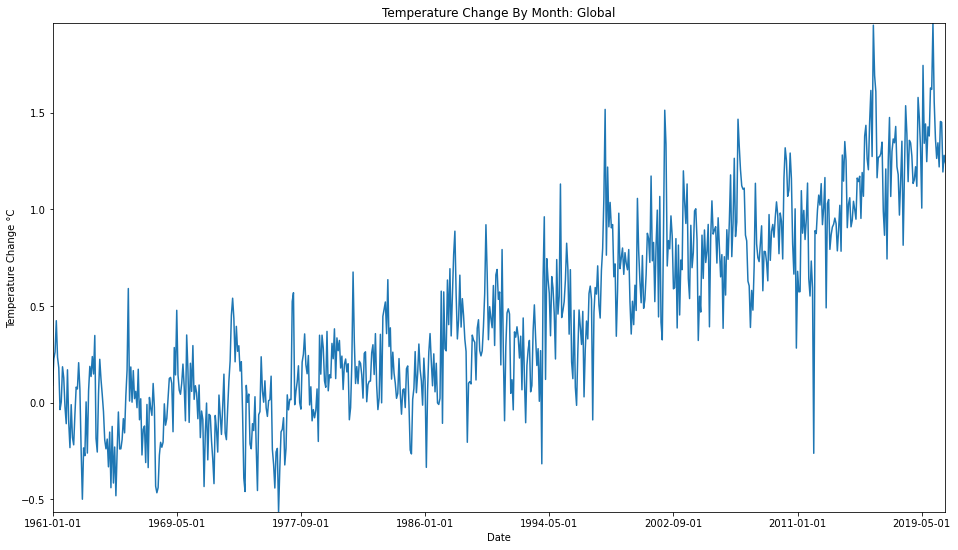

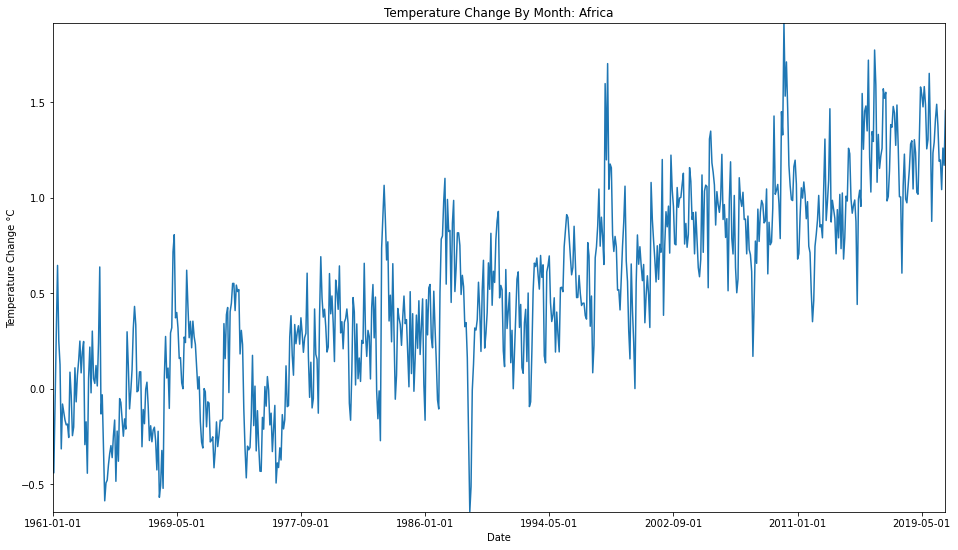

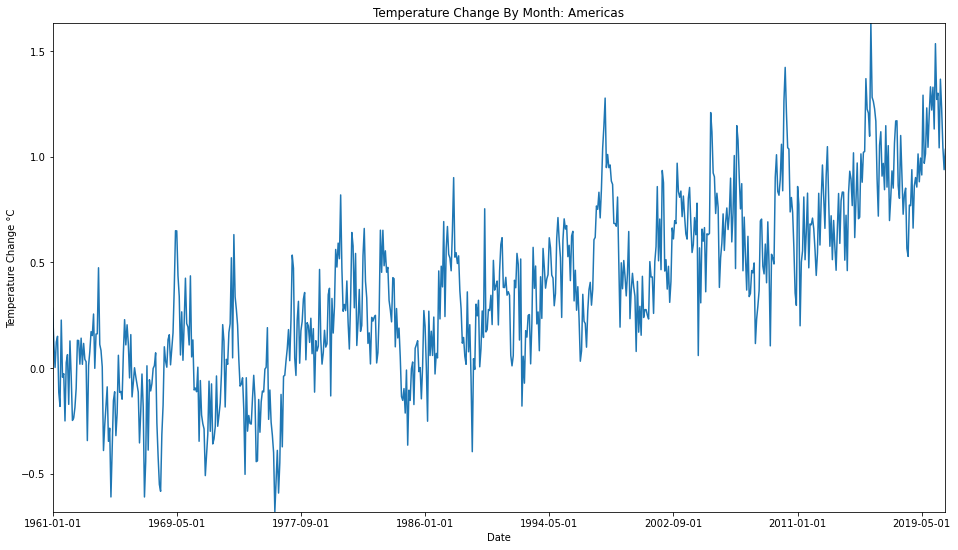

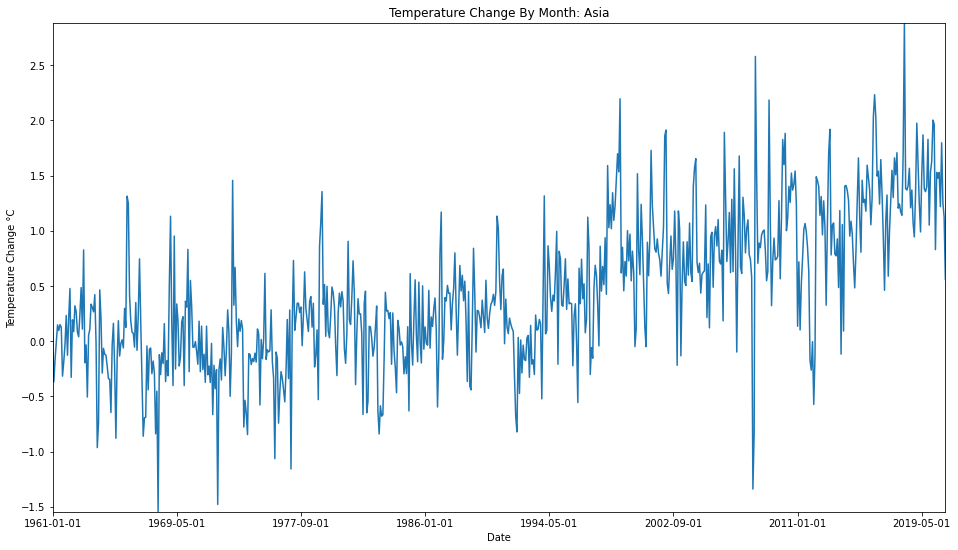

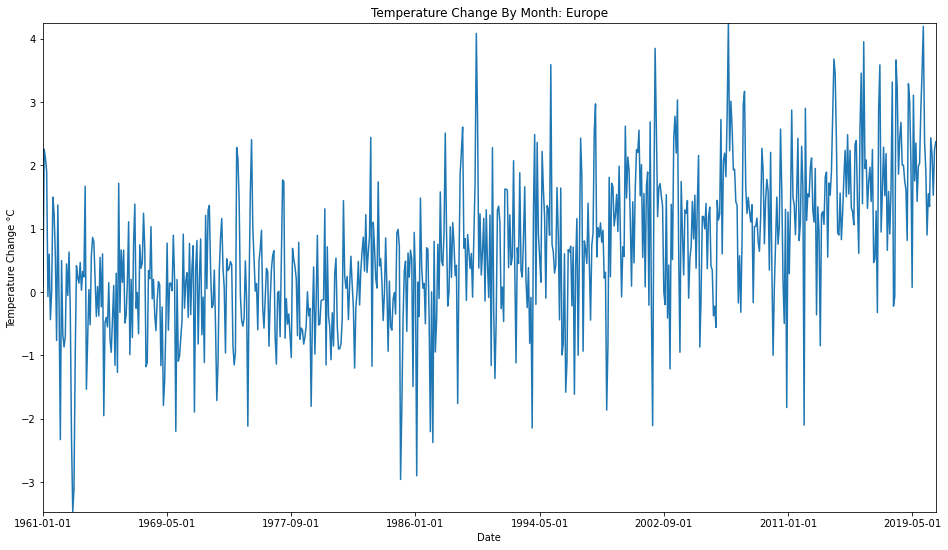

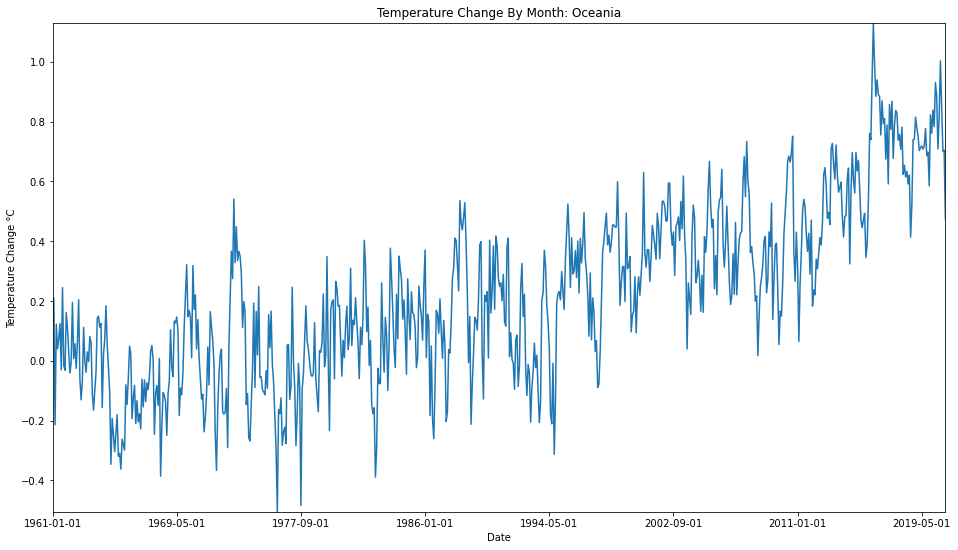

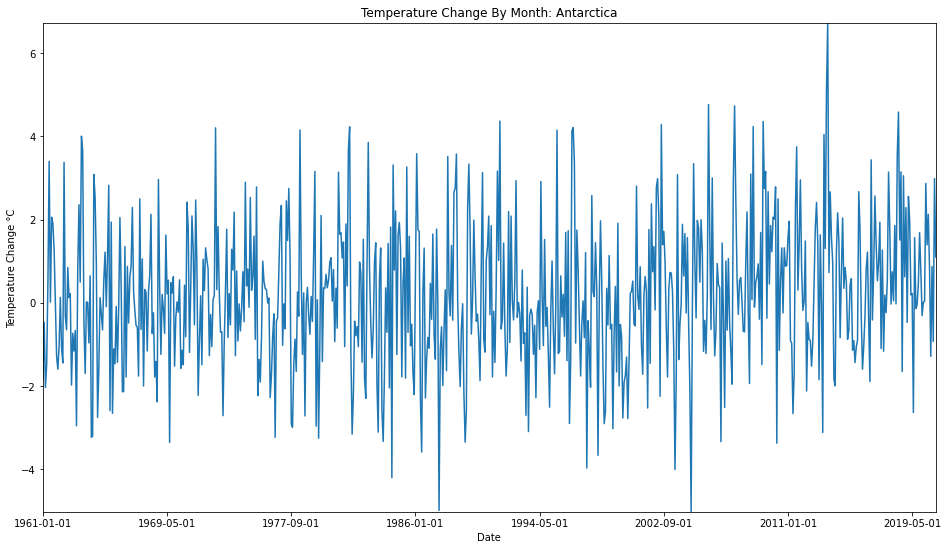

In [35]:
### Time series plot
for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = subp.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Temperature Change By Month: ' + region)
    plt.autoscale(tight=True)
    plt.show();



**Observation:** On this graphs of the 5 regions(Africa,Americas,Asia,Europe,Oceaniaand Antartica) and a global overview we can see that the Temperature change is increasing because there is a linear trend that is increasing , and we can see also seasonality due to the differents seasons from winter to summer that affect the difference in the Temperature change.

For a better view we did a rolling Average of 12 months  to smooth the graph which allows to have a clear view of the trend. 

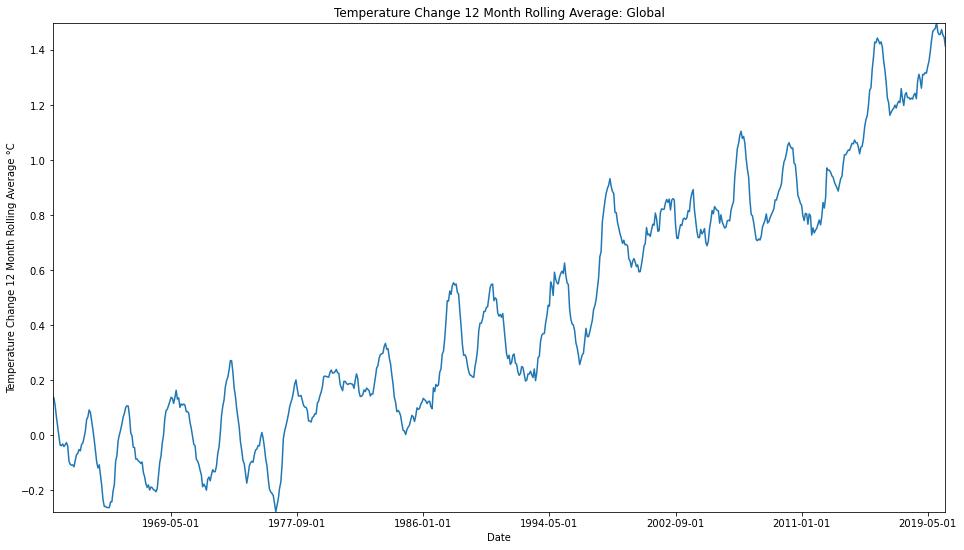

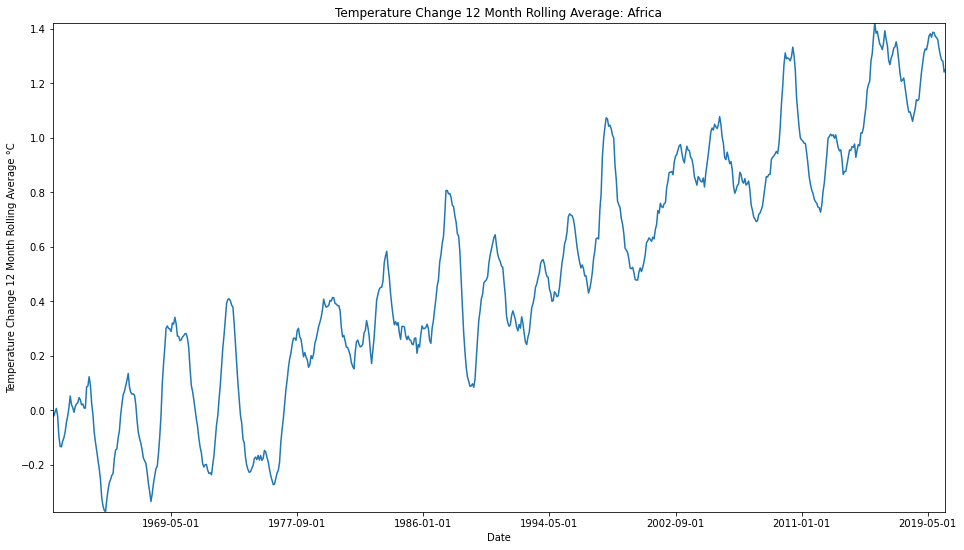

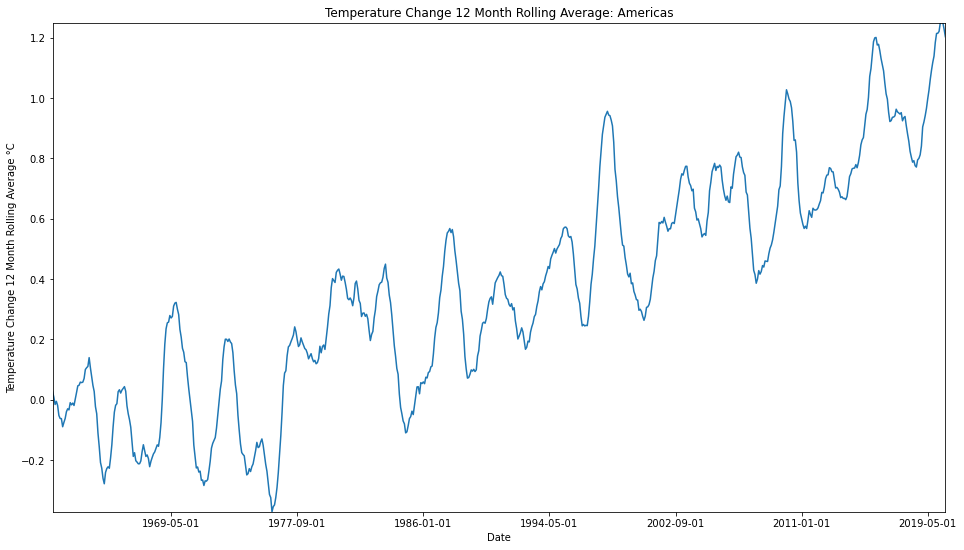

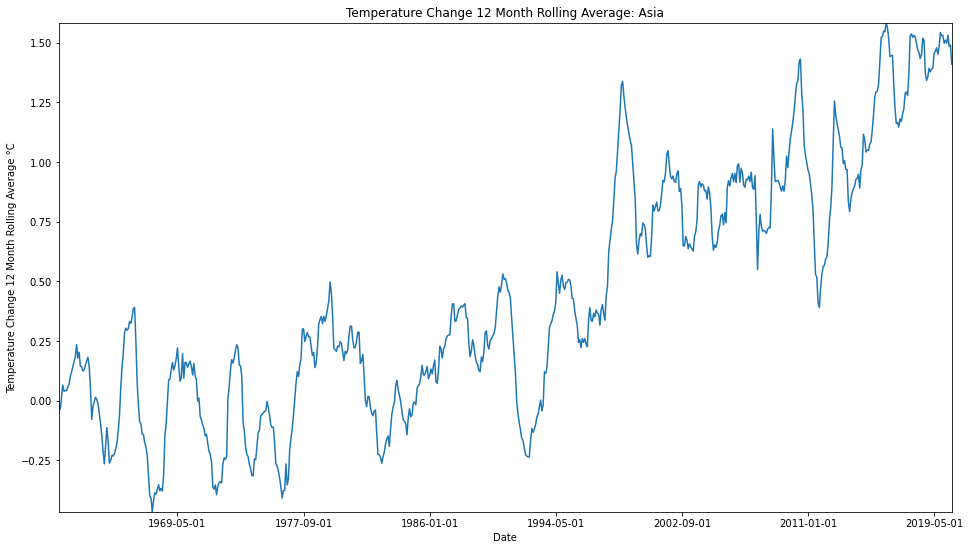

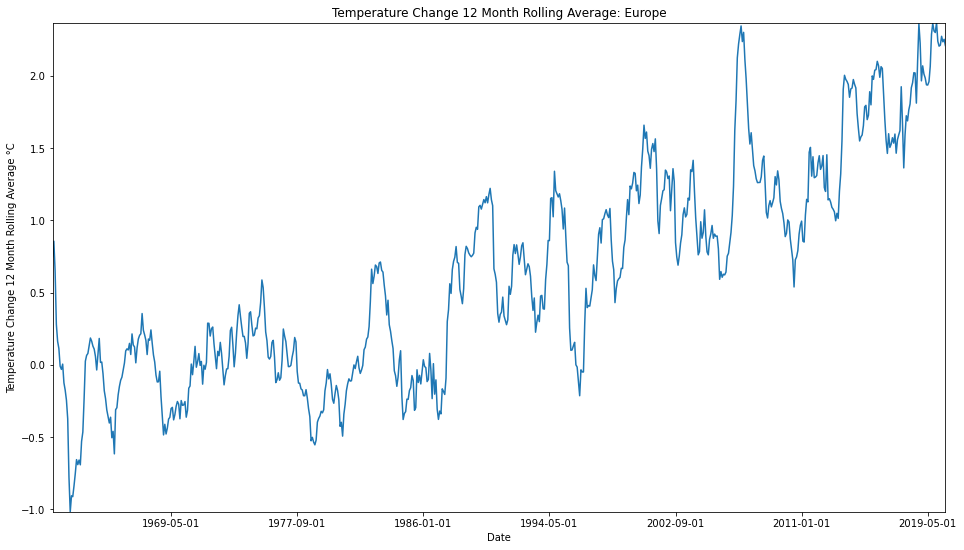

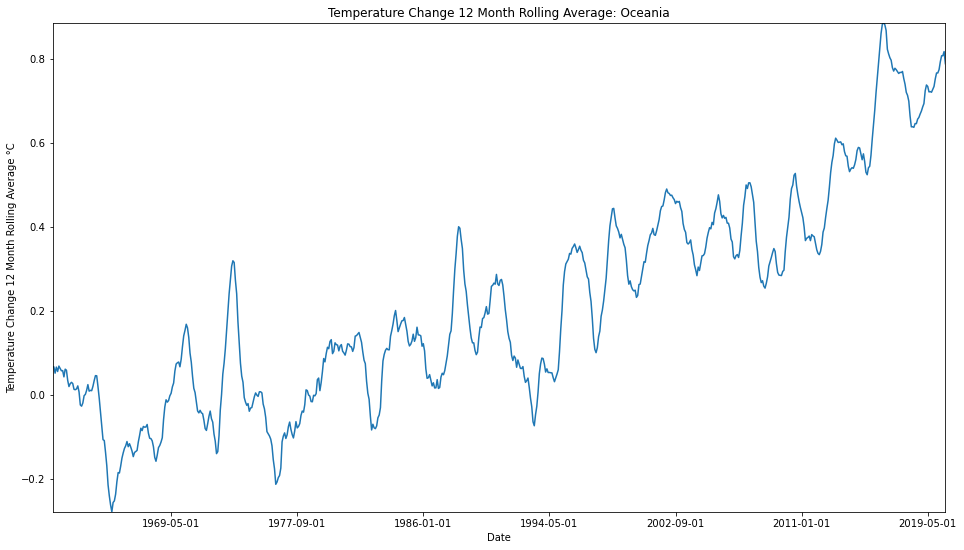

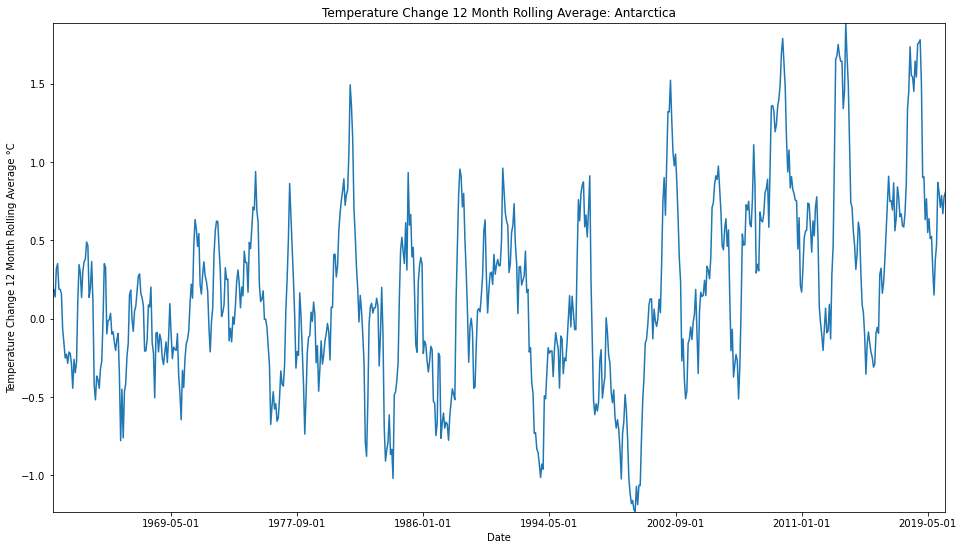

In [36]:
### Rolling Average plot 12 months

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        `
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    subp_rolling = subp.rolling(window=12, center=True).mean()
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = subp_rolling.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change 12 Month Rolling Average °C',
       title='Temperature Change 12 Month Rolling Average: ' + region)
    plt.autoscale(tight=True)
    plt.show();


### AutoCorrelations

In [37]:
data_asia_gr = data[data['region'] == 'Asia'].groupby(['date'])['value'].mean()

In [38]:
data_asia_gr_df = pd.DataFrame(data_asia_gr)

In [39]:
# trying different lag 
data_asia_gr_df['value'].autocorr(lag=3)

0.5931119355239063

In [40]:
data_asia_gr_df['value'].autocorr(lag=12)

0.4835797802863506

In [41]:
data_asia_gr_df['value'].autocorr(lag=60)

0.41238974547390966

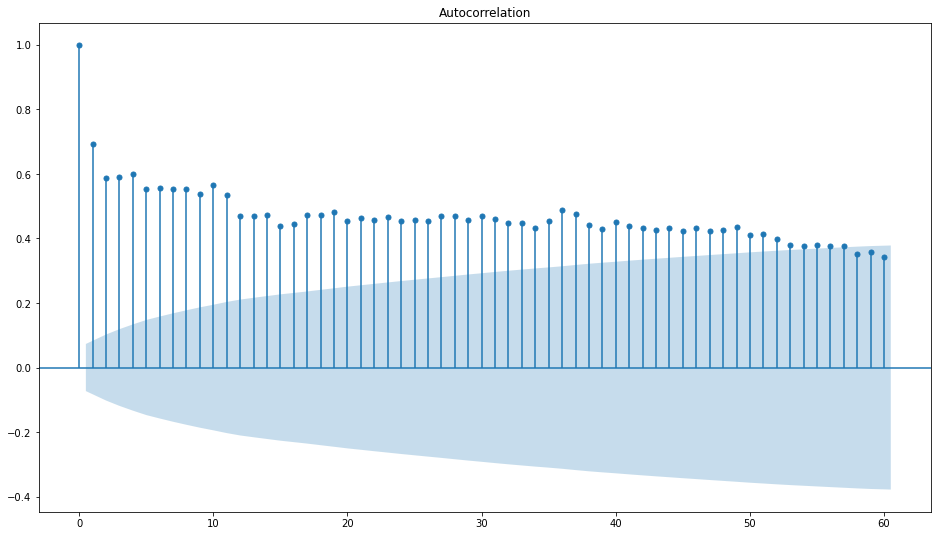

In [42]:
### sample plot for Asia Region
plt.rcParams["figure.figsize"] = [16,9]
plot_acf(data_asia_gr.values, lags=60)
plt.show()

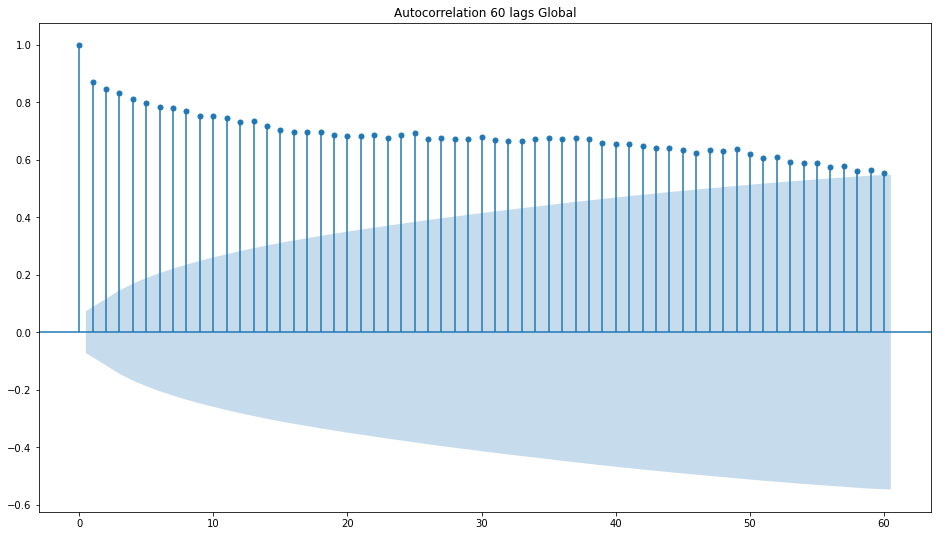

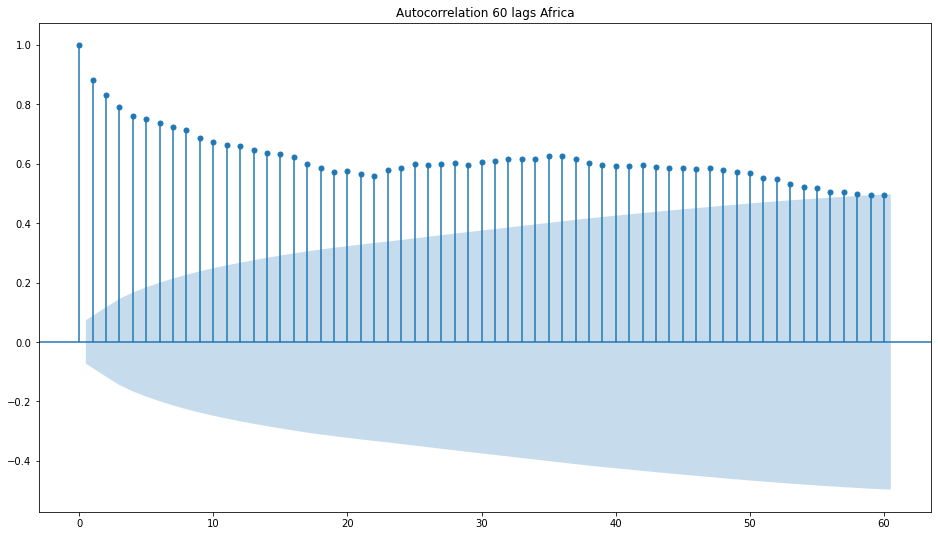

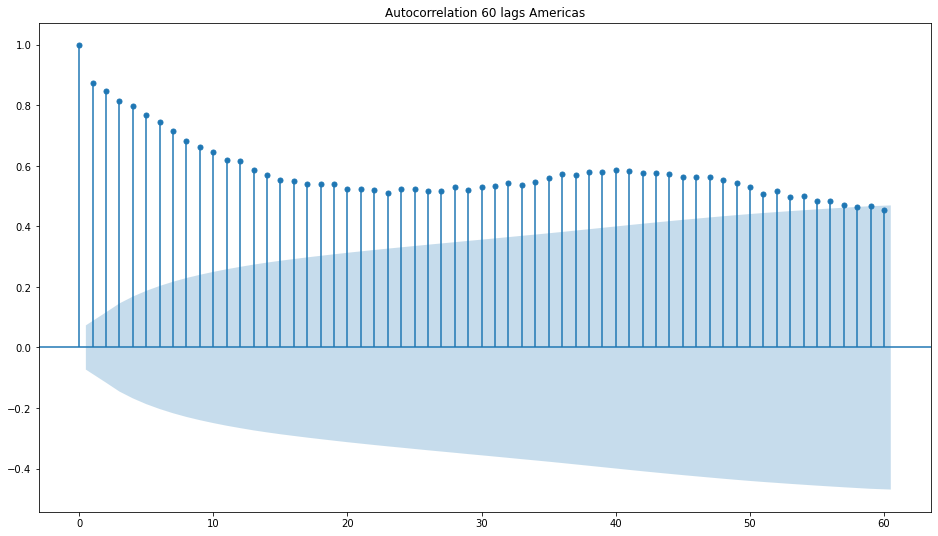

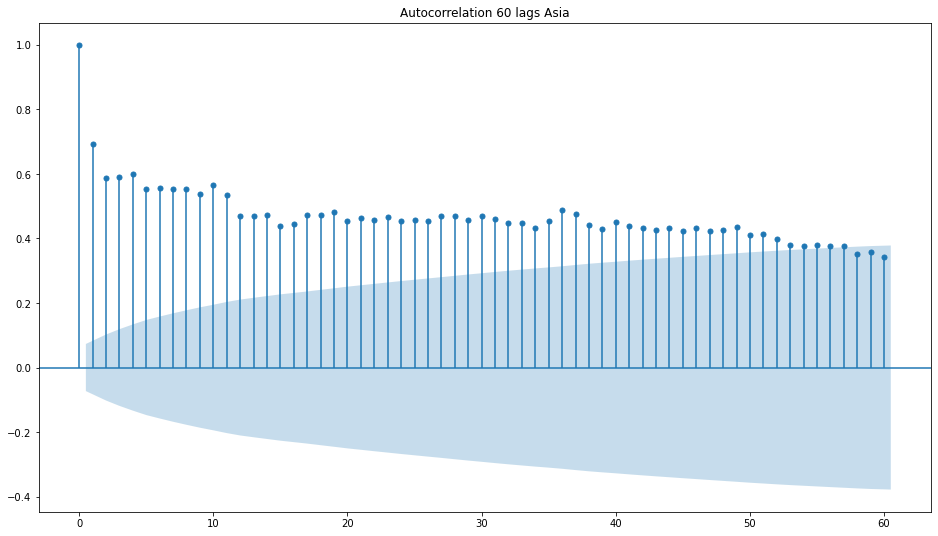

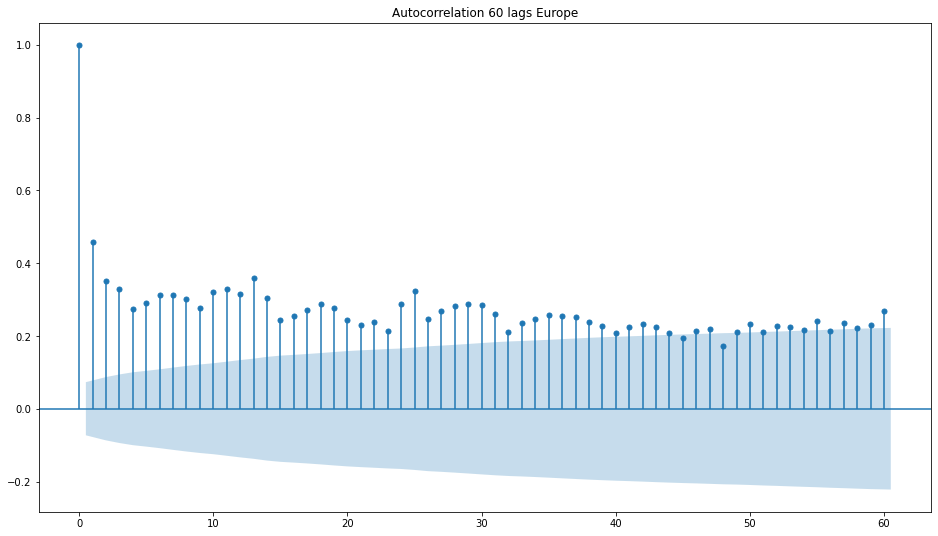

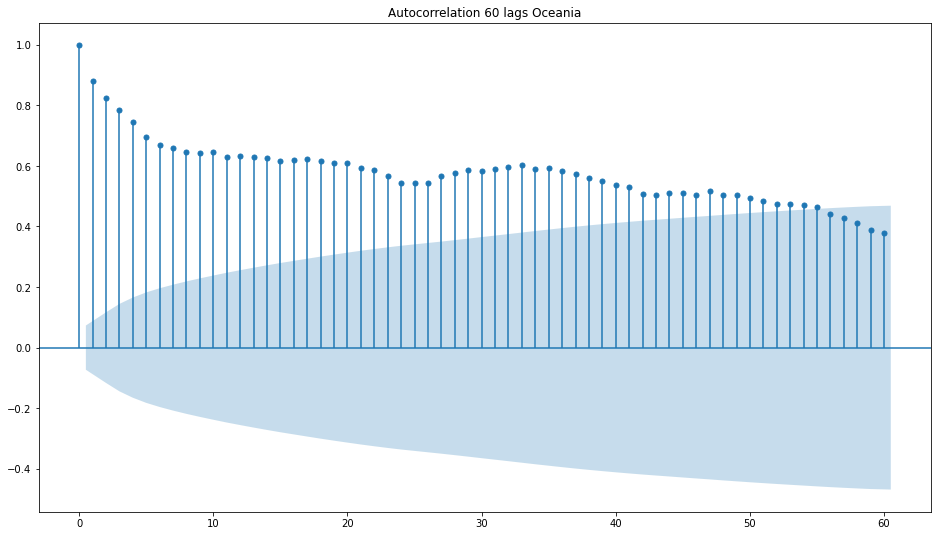

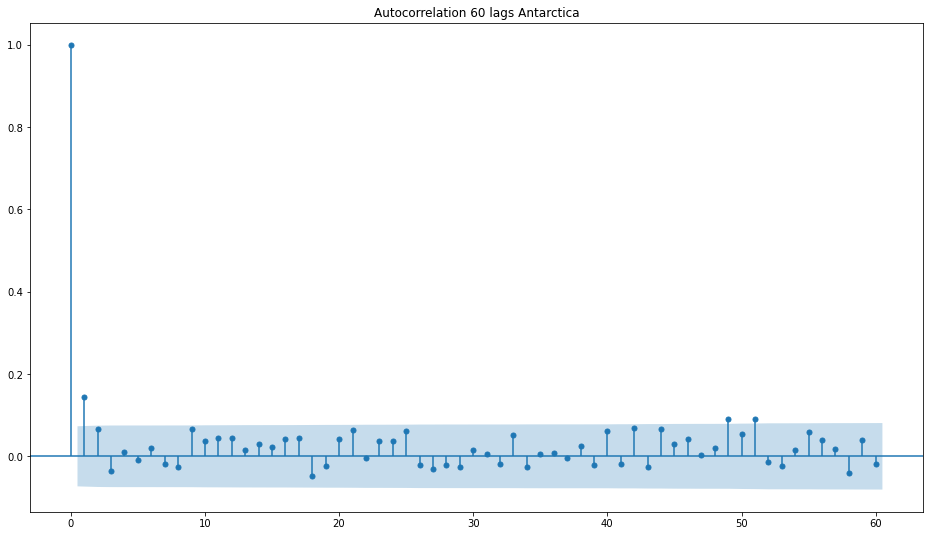

In [43]:
### Autocorrelations lag 60 all regions

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    plot_acf(subp, lags= 60 ,title= 'Autocorrelation 60 lags ' + region)

The plot of autocorrelation for the different regions shows that 

•	**Africa**:  we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,4,5,6,17,23,25,38,51 which we can infer that there is some correlation between consecutive 6 months that make seasons, and positive correlations that come around 2years,38 months. There are negative relationships that occur at 17months and 51 months.

•	**Americas**:  we can see that the temperature change is correlated from ACF up to 56 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,4,12,16,24,28,35,51,52 which we can infer that there is some correlation between consecutive 3-4 months that make seasons, and positive correlations that come around at 12,16,24,28,35and 52 months. There are negative relationships that occur 51 months.

•	**Asia**:  we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,6,7,8,10,12,17,19,36 which we can infer that there is some correlation between consecutive 3-6 months for different seasons, and positive correlations that come around 17,19, and 36 months. There are negative relationships that occur at 12months.


•	**Oceania**:  we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,6,7,9,10,12,16,24,25,27,33,42,44,48,56

•	**Europe**: we can see that the temperature change is correlated from ACF up to 40 months with the blue filled space that represents the 95% of confidence interval which means up to 3 years. There are spikes in the pacf at lag 1,2,3,5,6,7,8,10,11,13,24,25


•	**Antarctica**: we can see that the temperature change is correlated from ACF up to 40 months with the blue filled space that represents the 95% of confidence interval which means up to 3 years. There are spikes in the pacf at lag 1,9,18,49,51



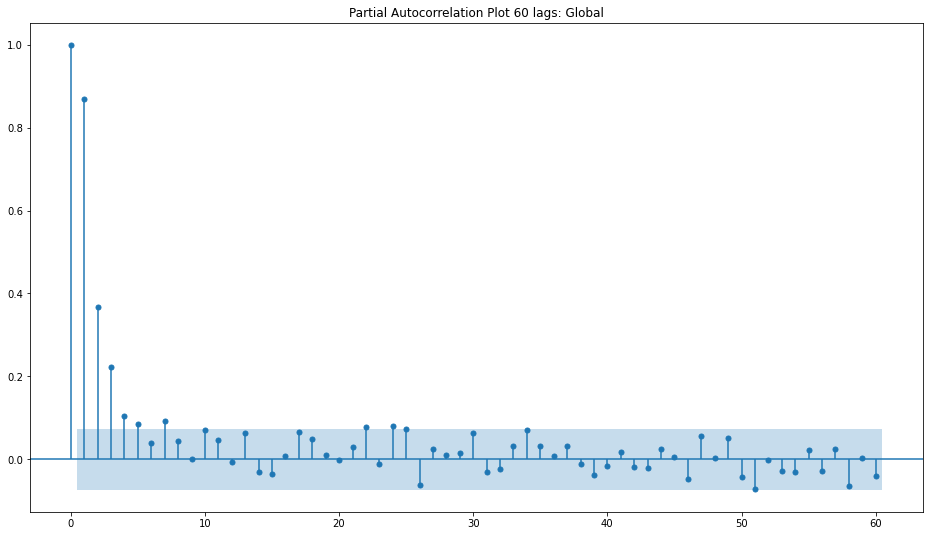

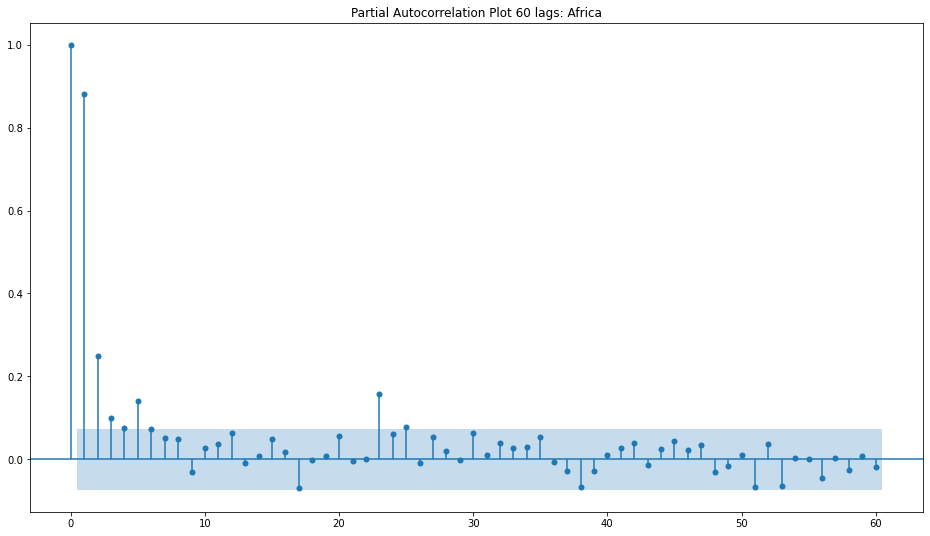

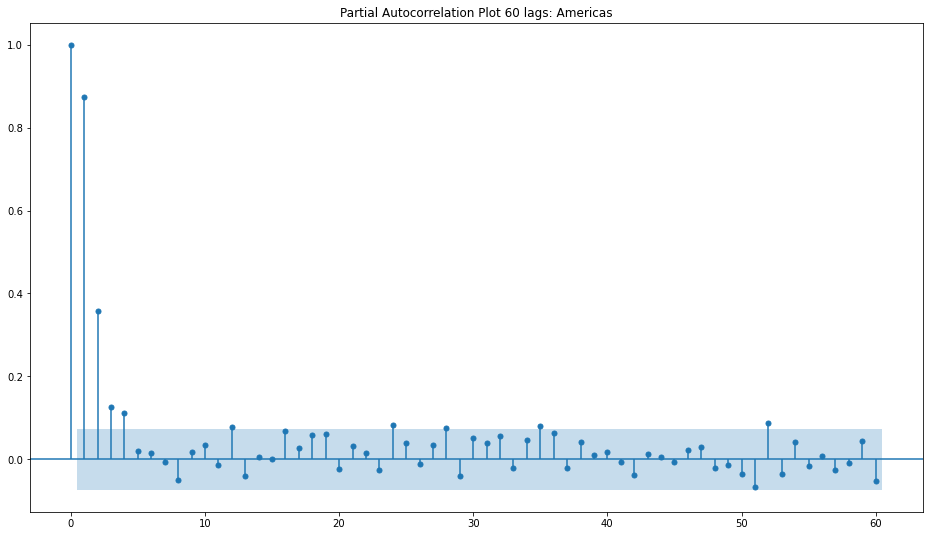

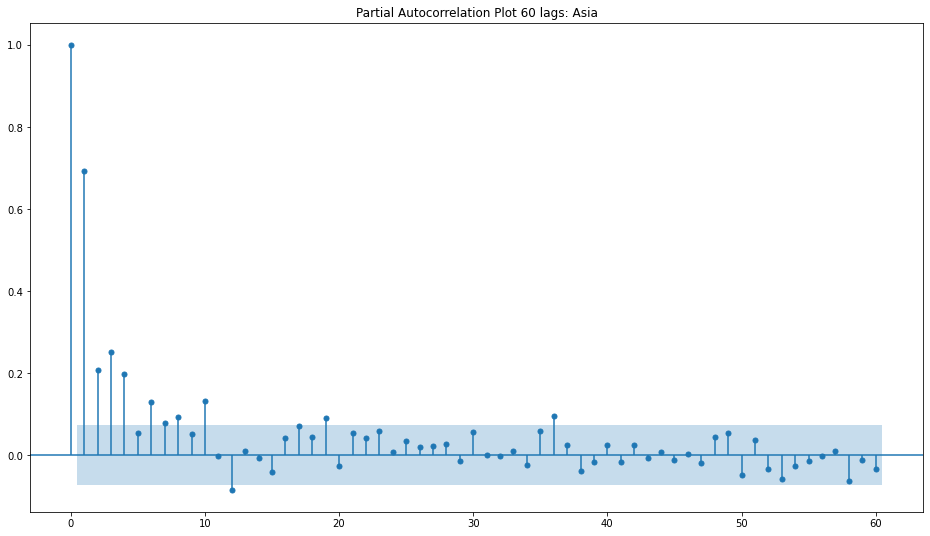

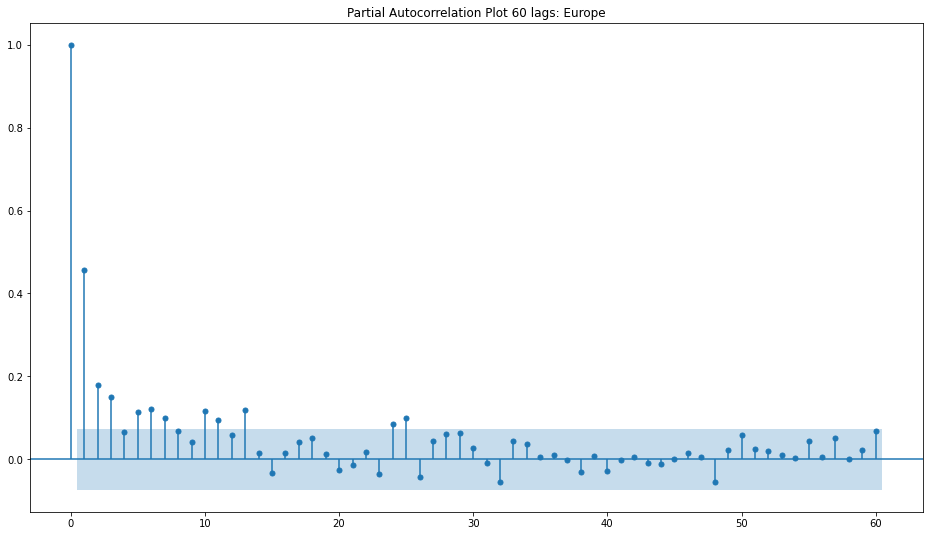

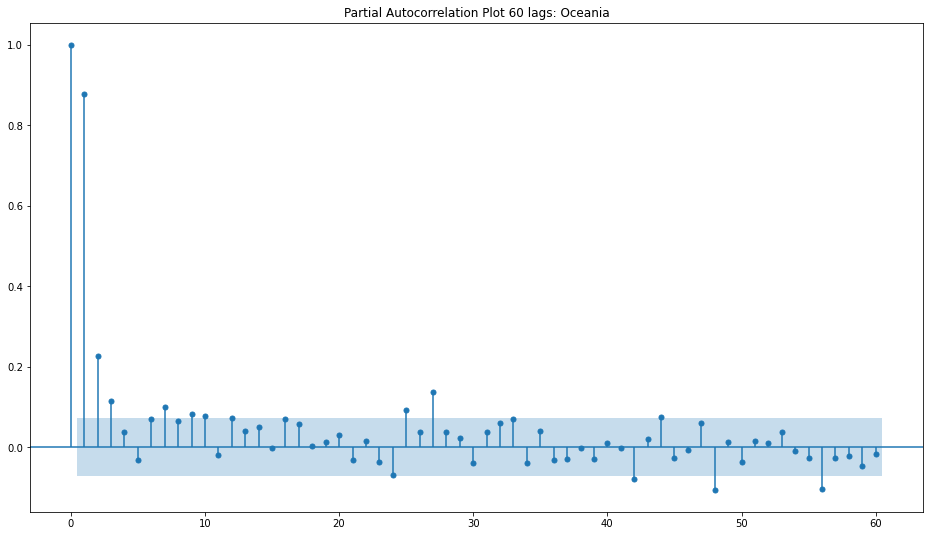

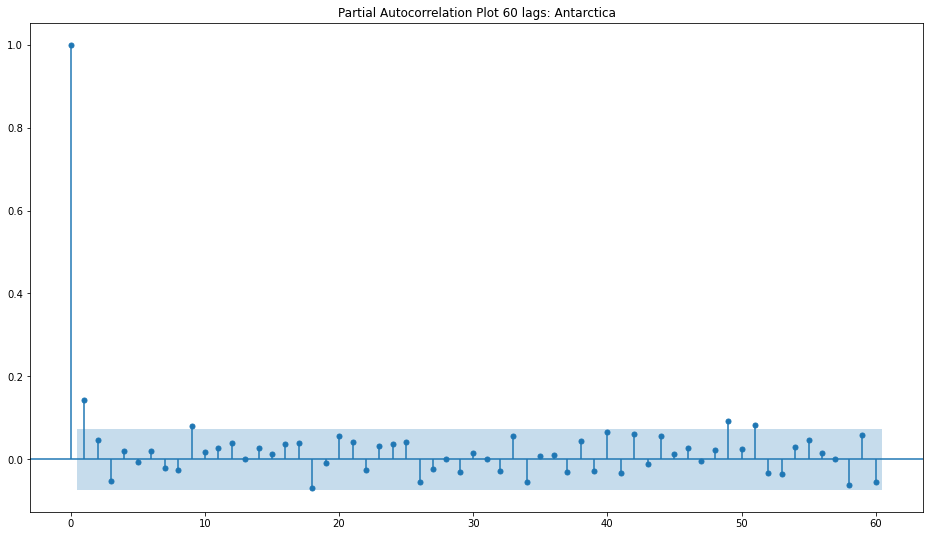

In [44]:
### Partial Autocorrelations lag 60 for all Regions
##plt.rcParams["figure.figsize"] = [16,9]

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    plot_pacf(subp.values, lags=60,title= 'Partial Autocorrelation Plot 60 lags: ' + region, method='ywm')

## Seasonality and trend 

In this part for better understanding of the data we did a sasonal decompose to visualize the trend and seasonality of the period of 60 months which is 5 years.

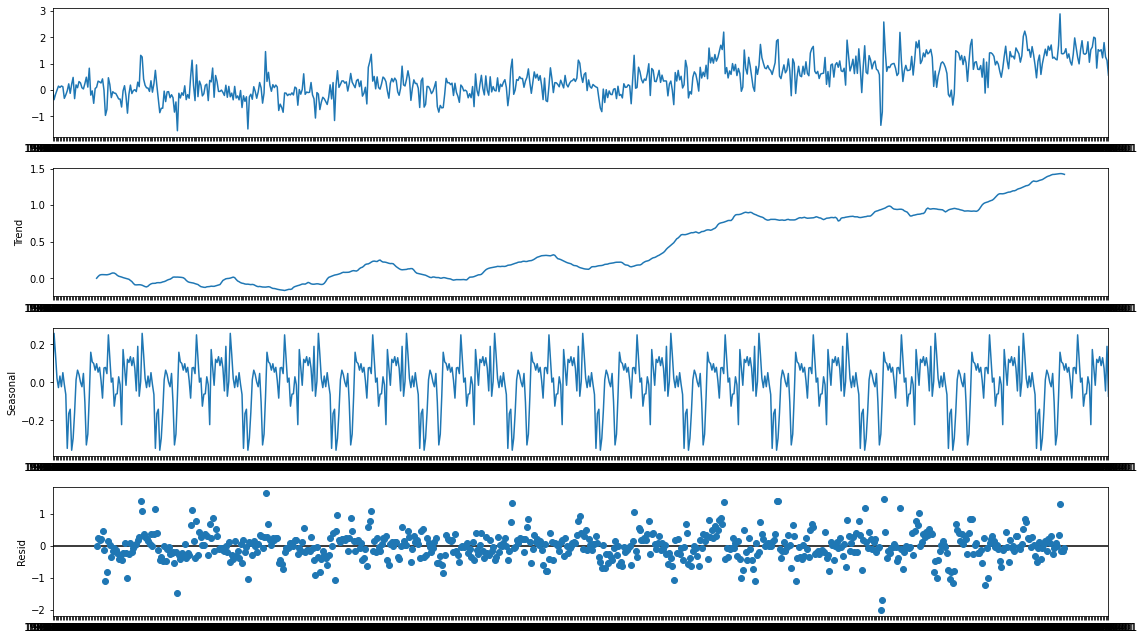

In [45]:
### sample decomposition for Asia Group
decomposition = seasonal_decompose(data_asia_gr_df , period = 60)
plt.rcParams["figure.figsize"] = [16,9]
decomposition.plot()
plt.show()

In [46]:
### Seasonality Decomposition for 1 year
for region in region_list:
    data_region = data[data['region'] == region]
    subp = data_region.groupby(['date'])['value'].mean()
    decomposition = seasonal_decompose(subp , period = 12)
    plt.figure(figsize = (16,9))
    plt.title(region)
    seasonal = decomposition.seasonal
    seasonal.plot()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)

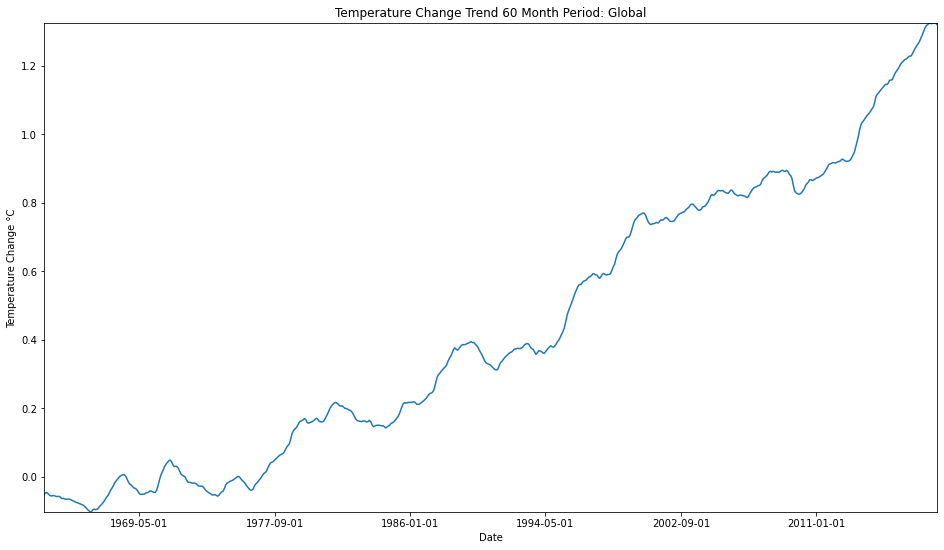

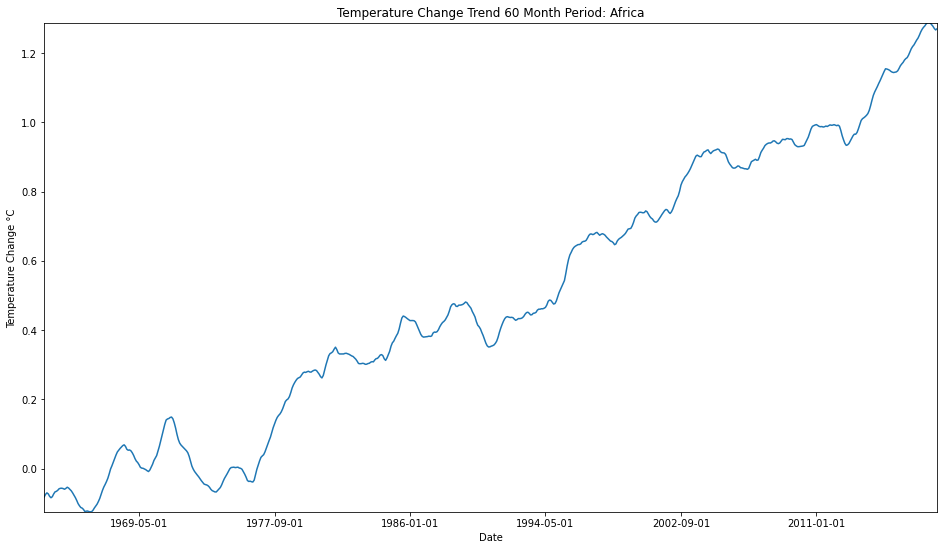

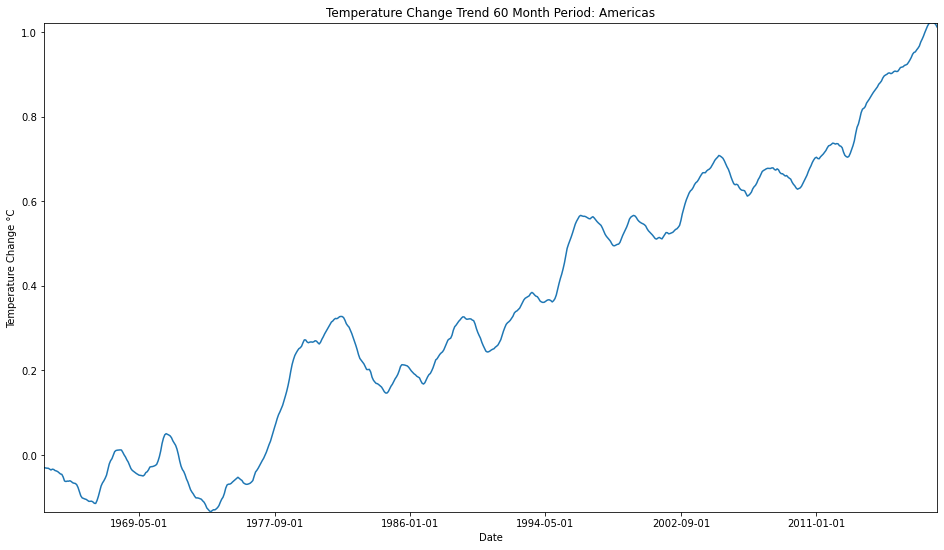

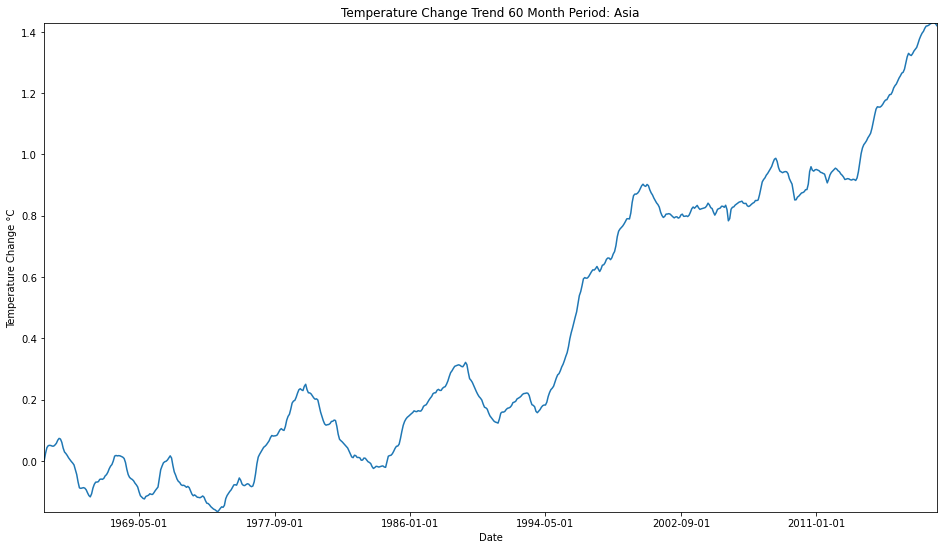

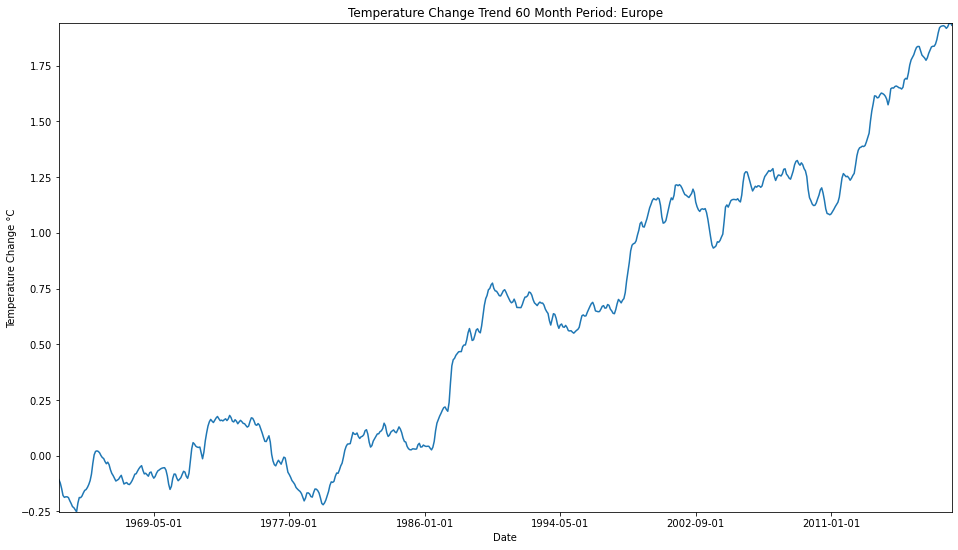

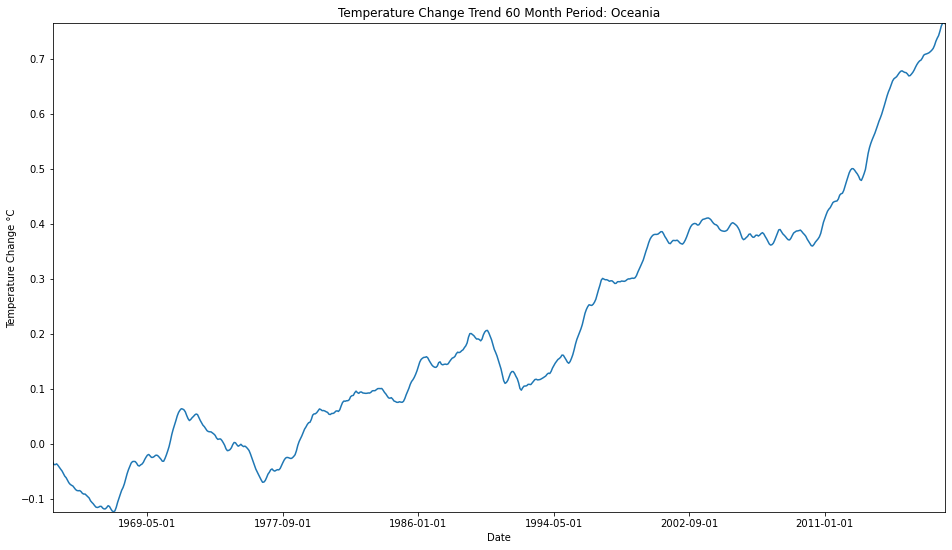

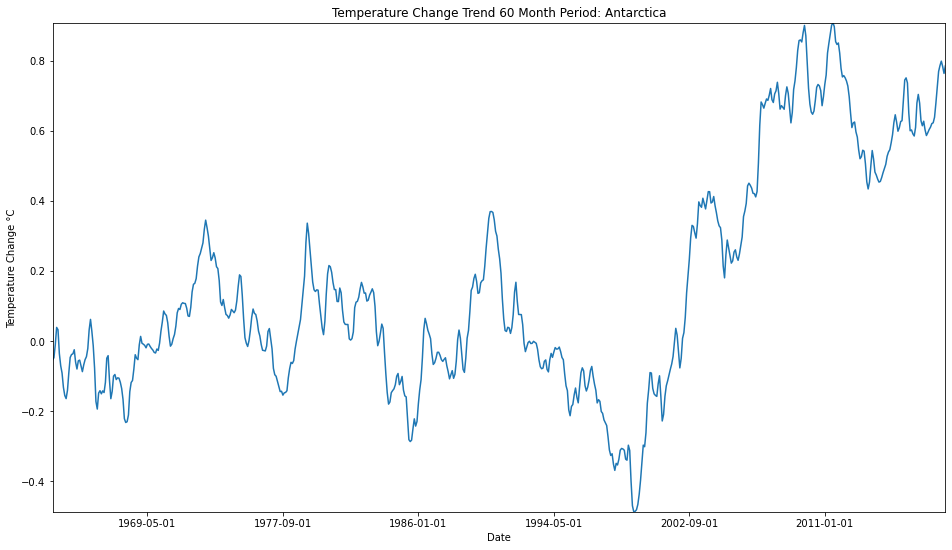

In [48]:
### Trend Decomposition in 5 years

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    decomposition = seasonal_decompose(subp , period = 60)  
    trend = decomposition.trend
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = trend.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Temperature Change Trend 60 Month Period: ' + region)
    plt.autoscale(tight=True)
    plt.show();    
        


**Observation:** With this  trend decomposition we can now see that Globaly the Temperature change is rising to **1.2°C**.If we look at each region we can see that Europe is having the highest Temperature change beacuse it is  almost at **1.8°C**.
Another Observation is that the highest Temperature in Antartica occured around **2009 to 2011** at **0.9°C** in temperature change. 



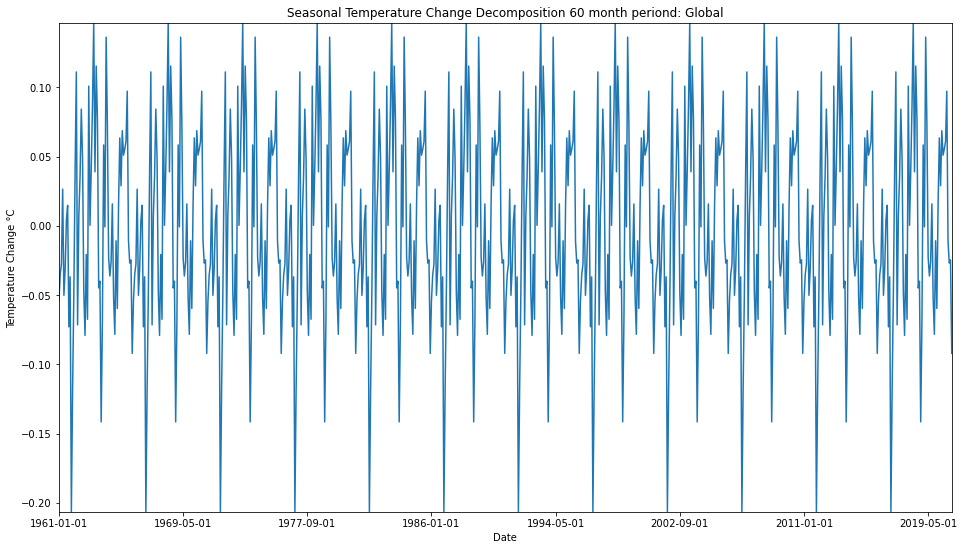

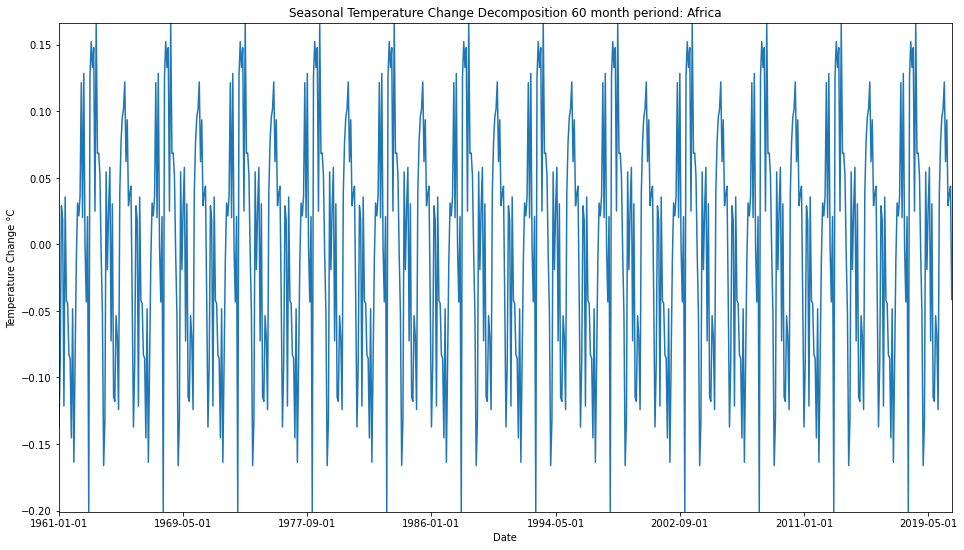

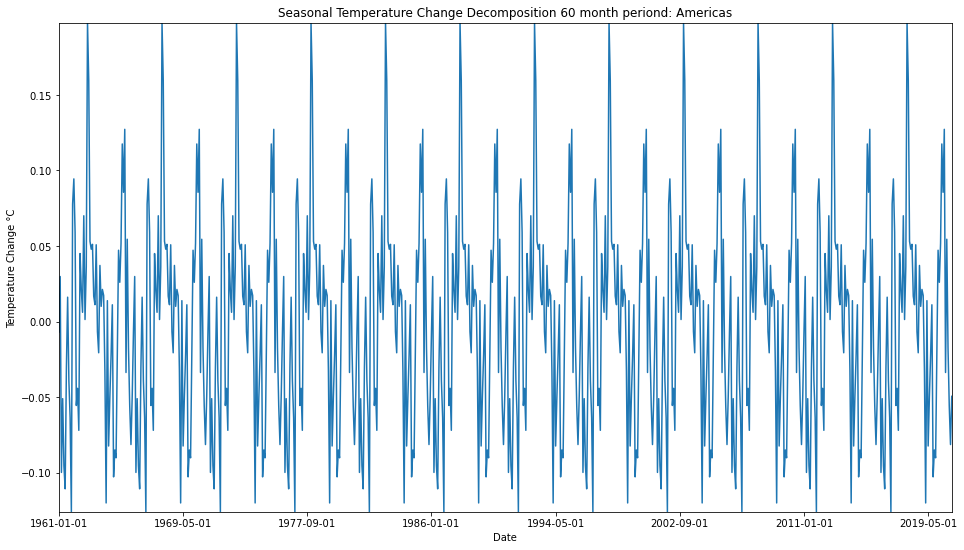

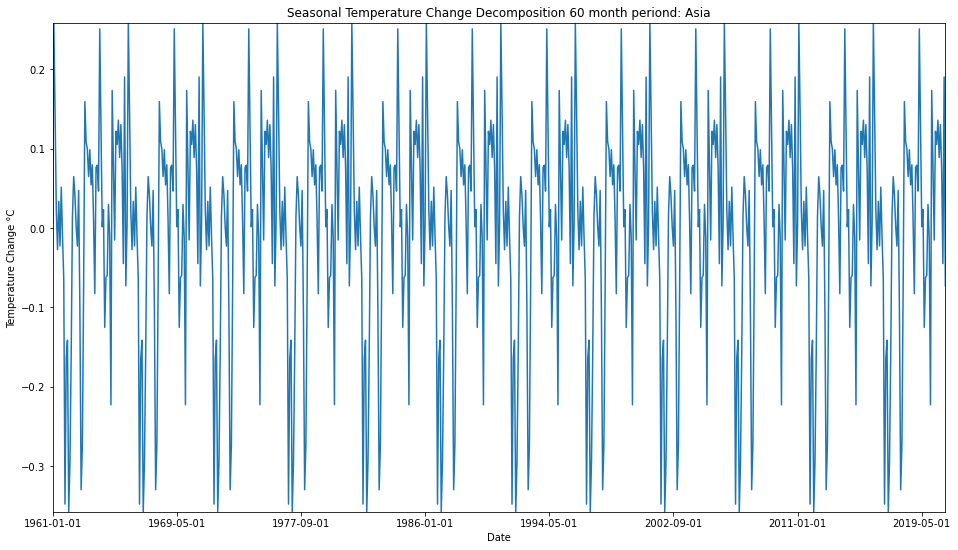

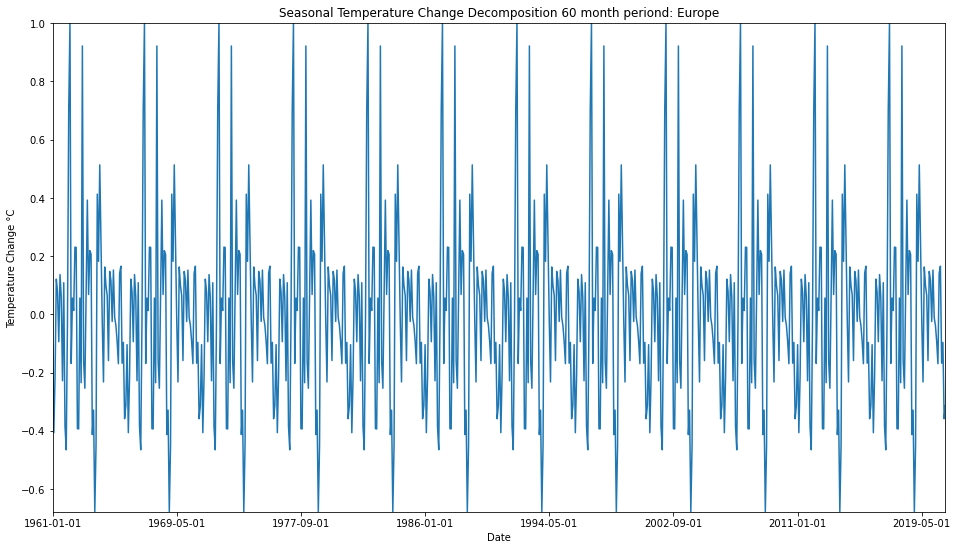

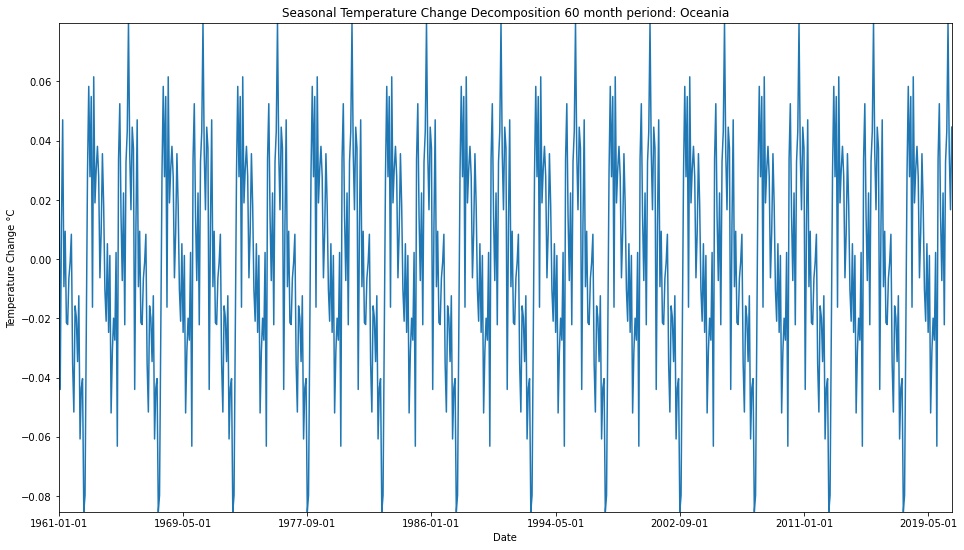

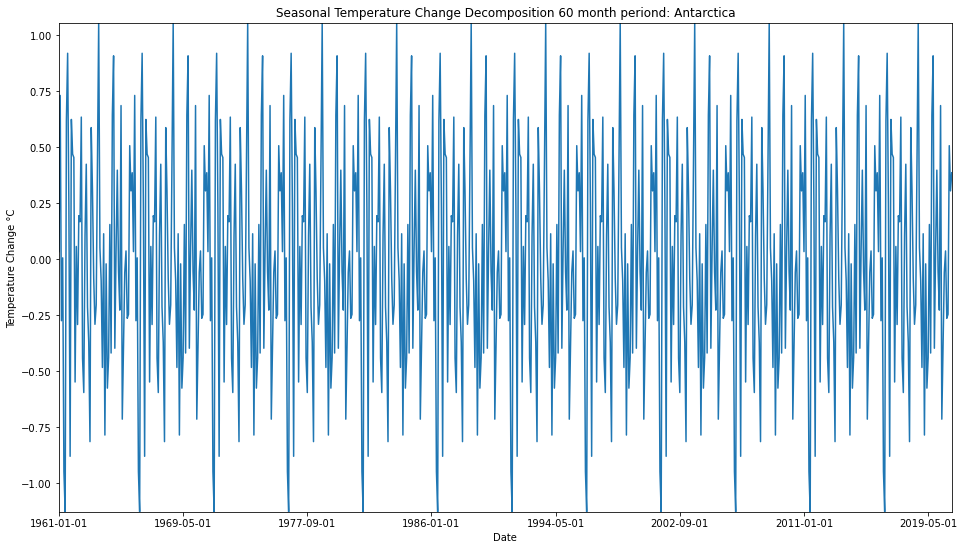

In [49]:
### Seasonality Decomposition for 5 year

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
        
    decomposition = seasonal_decompose(subp , period = 60)
    seasonal = decomposition.seasonal
    
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = seasonal.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Seasonal Temperature Change Decomposition 60 month periond: ' + region)
    plt.autoscale(tight=True)
    plt.show();    

**Observation:** With this seasonal decomposition we can now see that the  same Temperature change reoccurs after some time almost around 2 years which give it seasonality. 
 It is sligtly different  from region to region.

## Modeling

In this part we  built a SARIMAX model to predict and forecast  The Temperature change for the next 15 years. We choose to use SARIMAX because the model take into account the seasonality of our dataset.

SARIMA models include extra parameters related to the seasonal part.Therefore, a SARIMA(p,d,q)(P,D,Q,S) model have (p,d,q) that are non-seasonal parameters and P,D,Q,S that are the seasonal parameters.

Non-seasonal orders

p: Autoregressive order.
d: Differencing order.
q: Moving average order.

Seasonal orders

P: Seasonal autoregressive order.
D: Seasonal differencing order.
Q: Seasonal moving average order
S: Length of the seasonal cycle.

In [50]:
#changing the date column into datetime 
data['date']= pd.to_datetime(data.date)

In [51]:
data_region = data_asia_gr_df

In [52]:
#spliting into Train and test dataset  using  about 75% of the dataset.
print(f'Number of observations: {data.shape[0]}')
print(f'Number of training observations: {round(data.shape[0] * 0.75)}')
print(f'Number of testing observations: {data.shape[0] - (data.shape[0] * 0.75)}')


Number of observations: 162300
Number of training observations: 121725
Number of testing observations: 40575.0


In [53]:
train = data.iloc[:541,]
test = data.iloc[541:,]

In [54]:
train.index = pd.DatetimeIndex(train.index).to_period('M')

test.index = pd.DatetimeIndex(test.index).to_period('M')

In [59]:
train.head()

date  value  area_code_(fao)         area region      subregion
1970-01 1961-01-01  0.746                2  Afghanistan   Asia  Southern Asia
1970-01 1962-01-01  0.009                2  Afghanistan   Asia  Southern Asia
1970-01 1963-01-01  2.695                2  Afghanistan   Asia  Southern Asia
1970-01 1964-01-01 -5.277                2  Afghanistan   Asia  Southern Asia
1970-01 1965-01-01  1.827                2  Afghanistan   Asia  Southern Asia

We did **an Augmentated Dickey-Fuller** test to check if our time series are stationary.Using the a condisence interval of 95%. 

We interpret this result using the p-value from the test. A p-value below a threshold of  5%  suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

According to the p-value we can say that our data are stationary.

Based on that result our q in the SARIMAX parameters will be 0.


In [104]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [109]:
interpret_dftest(adfuller(train['value']))

Test Statistic   -5.952637e+00
p-value           2.129280e-07
dtype: float64

In [102]:
from statsmodels.tsa.stattools import adfuller 
def my_dickey_fuller(data):
    data = data.dropna()
    print('\t\t\033[1mResults of Dickey-Fuller Test\033[0m\n\n')
    df_test = adfuller(data, maxlag=0, autolag=None)
    
    print(f'Test Statistic \t\t\t\t {round(df_test[0],2)}')
    print(f'p-value \t\t\t\t {round(df_test[1],5)}')
    print(f'Lags Used \t\t\t\t {round(df_test[2],2)}')
    print(f'Number of Observations \t\t\t {round(df_test[3],2)}')
    
    for key, value in df_test[4].items():
        print(f'Critical Value {key} \t\t\t {round(value, 2)}')

In [108]:
my_dickey_fuller(train['value'])


		Results of Dickey-Fuller Test


Test Statistic 				 -21.71
p-value 				 0.0
Lags Used 				 0
Number of Observations 			 540
Critical Value 1% 			 -3.44
Critical Value 5% 			 -2.87
Critical Value 10% 			 -2.57


seasonal_order = (P, D, Q, S) and using order = (2, 0, 2)

We used a for loop  function to go through different value of P,D,Q which are seasonal orders to be used by the sarima model  in order to find the best seasonal parameters  and S length of the seasonal cycle will be determined by the partial autocorrelation by region. 
the best seasonal orders is (2,2,2,S)

In [110]:

import time
t0 = time.time()
final_mse = 10000000000000
final_S = 0
final_D = 0
final_P = 0
final_Q = 0

for S in range(3,7):
    for D in range(4):
        for P in range(4):
            for Q in range(4):
                print(f'Checking ({P}, {D}, {Q}, {S}) at {round(time.time() - t0)} seconds.')
                try:
                    sarima = SARIMAX(endog = train['value'],
                                     order = (2, 0, 2),
                                     seasonal_order = (P, D, Q, S)).fit()

                    sarima_pred = sarima.predict(start=start, end = end)

                    if mean_squared_error(test_values, sarima_pred) <final_mse:
                        final_mse = mean_squared_error(test_values, sarima_pred)
                        final_S = S
                        final_D = D
                        final_P = P
                        final_Q = Q

                    print(f'We just fit a SARIMAX(2, 0, 2)x({P}, {D}, {Q}, {S}) model with {mean_squared_error(test_values, sarima_pred)} MSE.')

                except:
                    pass

print(f'The final model is SARIMAX(2, 0, 2)x({final_P}, {final_D}, {final_Q}, {final_S}).')

Checking (0, 0, 0, 3) at 0 seconds.
Checking (0, 0, 1, 3) at 0 seconds.
Checking (0, 0, 2, 3) at 1 seconds.
Checking (0, 0, 3, 3) at 1 seconds.
Checking (1, 0, 0, 3) at 2 seconds.
Checking (1, 0, 1, 3) at 2 seconds.
Checking (1, 0, 2, 3) at 3 seconds.
Checking (1, 0, 3, 3) at 4 seconds.
Checking (2, 0, 0, 3) at 4 seconds.
Checking (2, 0, 1, 3) at 5 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 2, 3) at 6 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 3, 3) at 7 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 0, 3) at 8 seconds.
Checking (3, 0, 1, 3) at 8 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 2, 3) at 9 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 3, 3) at 10 seconds.
Checking (0, 1, 0, 3) at 12 seconds.
Checking (0, 1, 1, 3) at 12 seconds.
Checking (0, 1, 2, 3) at 12 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 1, 3, 3) at 13 seconds.
Checking (1, 1, 0, 3) at 14 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 1, 1, 3) at 15 seconds.
Checking (1, 1, 2, 3) at 16 seconds.
Checking (1, 1, 3, 3) at 17 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 0, 3) at 19 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 1, 3) at 20 seconds.
Checking (2, 1, 2, 3) at 22 seconds.
Checking (2, 1, 3, 3) at 23 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 0, 3) at 25 seconds.
Checking (3, 1, 1, 3) at 25 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 2, 3) at 27 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 3, 3) at 28 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 0, 3) at 30 seconds.
Checking (0, 2, 1, 3) at 31 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Checking (0, 2, 2, 3) at 32 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 3, 3) at 33 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 0, 3) at 34 seconds.
Checking (1, 2, 1, 3) at 35 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 2, 3) at 36 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 3, 3) at 40 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 0, 3) at 41 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 1, 3) at 42 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 2, 3) at 44 seconds.
Checking (2, 2, 3, 3) at 46 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 0, 3) at 47 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 1, 3) at 49 seconds.
Checking (3, 2, 2, 3) at 50 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 3, 3) at 53 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 3, 0, 3) at 55 seconds.
Checking (0, 3, 1, 3) at 56 seconds.
Checking (0, 3, 2, 3) at 56 seconds.
Checking (0, 3, 3, 3) at 57 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 0, 3) at 63 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 1, 3) at 64 seconds.
Checking (1, 3, 2, 3) at 65 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 3, 3) at 67 seconds.
Checking (2, 3, 0, 3) at 70 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 1, 3) at 71 seconds.
Checking (2, 3, 2, 3) at 72 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 3, 3) at 74 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 0, 3) at 76 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 1, 3) at 78 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 2, 3) at 79 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 3, 3) at 85 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 0, 0, 4) at 88 seconds.
Checking (0, 0, 1, 4) at 88 seconds.
Checking (0, 0, 2, 4) at 88 seconds.
Checking (0, 0, 3, 4) at 89 seconds.
Checking (1, 0, 0, 4) at 89 seconds.
Checking (1, 0, 1, 4) at 89 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 0, 2, 4) at 90 seconds.
Checking (1, 0, 3, 4) at 91 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 0, 4) at 93 seconds.
Checking (2, 0, 1, 4) at 93 seconds.
Checking (2, 0, 2, 4) at 95 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 3, 4) at 96 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 0, 4) at 98 seconds.
Checking (3, 0, 1, 4) at 98 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 2, 4) at 99 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 3, 4) at 101 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 1, 0, 4) at 102 seconds.
Checking (0, 1, 1, 4) at 103 seconds.
Checking (0, 1, 2, 4) at 104 seconds.
Checking (0, 1, 3, 4) at 105 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 1, 0, 4) at 107 seconds.
Checking (1, 1, 1, 4) at 107 seconds.
Checking (1, 1, 2, 4) at 108 seconds.
Checking (1, 1, 3, 4) at 109 seconds.
Checking (2, 1, 0, 4) at 111 seconds.
Checking (2, 1, 1, 4) at 112 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 2, 4) at 114 seconds.
Checking (2, 1, 3, 4) at 115 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 0, 4) at 117 seconds.
Checking (3, 1, 1, 4) at 118 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 2, 4) at 120 seconds.
Checking (3, 1, 3, 4) at 122 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 0, 4) at 124 seconds.
Checking (0, 2, 1, 4) at 124 seconds.
Checking (0, 2, 2, 4) at 125 seconds.
Checking (0, 2, 3, 4) at 127 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 0, 4) at 129 seconds.
Checking (1, 2, 1, 4) at 129 seconds.
Checking (1, 2, 2, 4) at 130 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 3, 4) at 132 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 0, 4) at 134 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 1, 4) at 135 seconds.
Checking (2, 2, 2, 4) at 136 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 3, 4) at 138 seconds.
Checking (3, 2, 0, 4) at 140 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 1, 4) at 141 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 2, 4) at 143 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 3, 4) at 146 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 3, 0, 4) at 148 seconds.
Checking (0, 3, 1, 4) at 149 seconds.
Checking (0, 3, 2, 4) at 150 seconds.
Checking (0, 3, 3, 4) at 151 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 0, 4) at 154 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 1, 4) at 155 seconds.
Checking (1, 3, 2, 4) at 157 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 3, 4) at 159 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 0, 4) at 162 seconds.
Checking (2, 3, 1, 4) at 163 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 2, 4) at 165 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 3, 4) at 168 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 0, 4) at 172 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 1, 4) at 175 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 2, 4) at 177 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 3, 4) at 181 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 0, 0, 5) at 184 seconds.
Checking (0, 0, 1, 5) at 184 seconds.
Checking (0, 0, 2, 5) at 185 seconds.
Checking (0, 0, 3, 5) at 185 seconds.
Checking (1, 0, 0, 5) at 186 seconds.
Checking (1, 0, 1, 5) at 186 seconds.
Checking (1, 0, 2, 5) at 186 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 0, 3, 5) at 187 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 0, 5) at 189 seconds.
Checking (2, 0, 1, 5) at 189 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 2, 5) at 190 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 3, 5) at 191 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 0, 5) at 193 seconds.
Checking (3, 0, 1, 5) at 193 seconds.
Checking (3, 0, 2, 5) at 194 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 3, 5) at 196 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Checking (0, 1, 0, 5) at 198 seconds.
Checking (0, 1, 1, 5) at 198 seconds.
Checking (0, 1, 2, 5) at 198 seconds.
Checking (0, 1, 3, 5) at 199 seconds.
Checking (1, 1, 0, 5) at 200 seconds.
Checking (1, 1, 1, 5) at 201 seconds.
Checking (1, 1, 2, 5) at 201 seconds.
Checking (1, 1, 3, 5) at 203 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 0, 5) at 205 seconds.
Checking (2, 1, 1, 5) at 206 seconds.
Checking (2, 1, 2, 5) at 207 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 3, 5) at 208 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 0, 5) at 211 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 1, 5) at 212 seconds.
Checking (3, 1, 2, 5) at 213 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 3, 5) at 215 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 0, 5) at 218 seconds.
Checking (0, 2, 1, 5) at 218 seconds.
Checking (0, 2, 2, 5) at 219 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 3, 5) at 221 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 0, 5) at 223 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 1, 5) at 224 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 2, 5) at 227 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 3, 5) at 230 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 0, 5) at 233 seconds.
Checking (2, 2, 1, 5) at 233 seconds.
Checking (2, 2, 2, 5) at 235 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 3, 5) at 237 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 0, 5) at 240 seconds.
Checking (3, 2, 1, 5) at 241 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 2, 5) at 244 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 3, 5) at 249 seconds.
Checking (0, 3, 0, 5) at 253 seconds.
Checking (0, 3, 1, 5) at 254 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 3, 2, 5) at 255 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 3, 3, 5) at 259 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 0, 5) at 262 seconds.
Checking (1, 3, 1, 5) at 263 seconds.
Checking (1, 3, 2, 5) at 265 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 3, 5) at 268 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 0, 5) at 271 seconds.
Checking (2, 3, 1, 5) at 273 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 2, 5) at 275 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 3, 5) at 279 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 0, 5) at 283 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 1, 5) at 287 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 2, 5) at 291 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 3, 5) at 295 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 0, 0, 6) at 300 seconds.
Checking (0, 0, 1, 6) at 300 seconds.
Checking (0, 0, 2, 6) at 300 seconds.
Checking (0, 0, 3, 6) at 300 seconds.
Checking (1, 0, 0, 6) at 301 seconds.
Checking (1, 0, 1, 6) at 301 seconds.
Checking (1, 0, 2, 6) at 302 seconds.
Checking (1, 0, 3, 6) at 302 seconds.
Checking (2, 0, 0, 6) at 303 seconds.
Checking (2, 0, 1, 6) at 303 seconds.
Checking (2, 0, 2, 6) at 304 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 0, 3, 6) at 305 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 0, 6) at 307 seconds.
Checking (3, 0, 1, 6) at 308 seconds.
Checking (3, 0, 2, 6) at 308 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 0, 3, 6) at 310 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 1, 0, 6) at 312 seconds.
Checking (0, 1, 1, 6) at 313 seconds.
Checking (0, 1, 2, 6) at 314 seconds.
Checking (0, 1, 3, 6) at 315 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 1, 0, 6) at 317 seconds.
Checking (1, 1, 1, 6) at 318 seconds.
Checking (1, 1, 2, 6) at 319 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 1, 3, 6) at 321 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 0, 6) at 324 seconds.
Checking (2, 1, 1, 6) at 324 seconds.
Checking (2, 1, 2, 6) at 326 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 1, 3, 6) at 328 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 0, 6) at 331 seconds.
Checking (3, 1, 1, 6) at 331 seconds.
Checking (3, 1, 2, 6) at 333 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 1, 3, 6) at 336 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 0, 6) at 339 seconds.
Checking (0, 2, 1, 6) at 340 seconds.
Checking (0, 2, 2, 6) at 341 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 2, 3, 6) at 343 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 2, 0, 6) at 348 seconds.
Checking (1, 2, 1, 6) at 349 seconds.
Checking (1, 2, 2, 6) at 350 seconds.
Checking (1, 2, 3, 6) at 353 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 0, 6) at 357 seconds.
Checking (2, 2, 1, 6) at 359 seconds.
Checking (2, 2, 2, 6) at 361 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 2, 3, 6) at 363 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 0, 6) at 367 seconds.
Checking (3, 2, 1, 6) at 371 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 2, 6) at 374 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 2, 3, 6) at 377 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (0, 3, 0, 6) at 381 seconds.
Checking (0, 3, 1, 6) at 382 seconds.
Checking (0, 3, 2, 6) at 384 seconds.
Checking (0, 3, 3, 6) at 386 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 0, 6) at 390 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (1, 3, 1, 6) at 392 seconds.
Checking (1, 3, 2, 6) at 395 seconds.
Checking (1, 3, 3, 6) at 398 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 0, 6) at 403 seconds.
Checking (2, 3, 1, 6) at 406 seconds.
Checking (2, 3, 2, 6) at 409 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (2, 3, 3, 6) at 414 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 0, 6) at 420 seconds.
Checking (3, 3, 1, 6) at 422 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 2, 6) at 427 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Checking (3, 3, 3, 6) at 433 seconds.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The final model is SARIMAX(2, 0, 2)x(0, 0, 0, 0).



The final model is SARIMAX(2, 0, 2)x(2, 2, 2, 6).

We used **AIC (Akaike information criterion)** metric to find the best value of p and q for non-seasonal orders .
The best_aic  is (4,0,4)

In [60]:

# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):

        
            # Fitting an ARIMA(p, 1, q) model
            print(f'Attempting to fit ARIMA{p},0, {q} model')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog= train['value'].astype(float).dropna(),order = (p,1,q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA ({p},0,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

    
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA ({best_p },0,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA0,0, 0 model
The AIC for ARIMA (0,0,0) is: 2259.096517705045
Attempting to fit ARIMA0,0, 1 model
The AIC for ARIMA (0,0,1) is: 1919.182890969209
Attempting to fit ARIMA0,0, 2 model
The AIC for ARIMA (0,0,2) is: 1915.7688327460596
Attempting to fit ARIMA0,0, 3 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (0,0,3) is: 1917.6563749341485
Attempting to fit ARIMA0,0, 4 model
The AIC for ARIMA (0,0,4) is: 1908.1202335663586
Attempting to fit ARIMA1,0, 0 model
The AIC for ARIMA (1,0,0) is: 2075.487715695112
Attempting to fit ARIMA1,0, 1 model
The AIC for ARIMA (1,0,1) is: 1916.1899788792825
Attempting to fit ARIMA1,0, 2 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

The AIC for ARIMA (1,0,2) is: 1917.7253534136084
Attempting to fit ARIMA1,0, 3 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (1,0,3) is: 1918.5030300950498
Attempting to fit ARIMA1,0, 4 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (1,0,4) is: 1895.5120494229793
Attempting to fit ARIMA2,0, 0 model
The AIC for ARIMA (2,0,0) is: 1983.200321632229
Attempting to fit ARIMA2,0, 1 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

The AIC for ARIMA (2,0,1) is: 1916.9244529259988
Attempting to fit ARIMA2,0, 2 model
The AIC for ARIMA (2,0,2) is: 1918.10612756529
Attempting to fit ARIMA2,0, 3 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (2,0,3) is: 1918.6743311139567
Attempting to fit ARIMA2,0, 4 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
 

The AIC for ARIMA (2,0,4) is: 1921.7726203789837
Attempting to fit ARIMA3,0, 0 model
The AIC for ARIMA (3,0,0) is: 1952.7934967629421
Attempting to fit ARIMA3,0, 1 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (3,0,1) is: 1902.2562882141035
Attempting to fit ARIMA3,0, 2 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (3,0,2) is: 1920.0997836916958
Attempting to fit ARIMA3,0, 3 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (3,0,3) is: 1914.8982478394262
Attempting to fit ARIMA3,0, 4 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (3,0,4) is: 1914.6499411099899
Attempting to fit ARIMA4,0, 0 model
The AIC for ARIMA (4,0,0) is: 1941.9801514093115
Attempting to fit ARIMA4,0, 1 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (4,0,1) is: 1898.179985666077
Attempting to fit ARIMA4,0, 2 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The AIC for ARIMA (4,0,2) is: 1897.5385343293428
Attempting to fit ARIMA4,0, 3 model


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
 

The AIC for ARIMA (4,0,3) is: 1899.5378617250578
Attempting to fit ARIMA4,0, 4 model
The AIC for ARIMA (4,0,4) is: 1919.2145516220098


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA (1,0,4).
This model has an AIC of 1895.5120494229793.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [74]:
def sarimax_model(region, S):
    ### define dataframe of region to model
    if region == 'Global':
        data_region = pd.DataFrame(data.groupby(['date'])['value'].mean())
    else:        
        data_region = pd.DataFrame(data[data['region'] == region].groupby(['date'])['value'].mean())
    
    ### train test split  
    data_region.index = pd.DatetimeIndex(data_region.index).to_period('M')
  
    train = data_region.iloc[:541,]
    test = data_region.iloc[541:,]
    
    ## fit model
    sarima_model = SARIMAX(endog = train['value'] ,order = (4, 0, 4), seasonal_order = (2, 2, 2, S)).fit()
    
    ## get mean squared error
    start = test.index[0]
    end = test.index[-1]
    sarima_pred = sarima.predict(start=start, end = end)
    test_values = test['value']
    mse = mean_squared_error(test_values, sarima_pred)
    
    
    ### plot actual vs predicted
    preds = pd.DataFrame(sarima_pred.values, index=sarima_pred.index)
    test.rename(columns = {'value':'actual'}, inplace = True)
    preds.rename(columns = {0:'predicted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Actual vs Predicted Temperature Change: ' + region + ' (MSE: ' + str(mse) + ')')
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    preds.plot(ax=ax);

    ### plot forecast model
    sarima_forecast = SARIMAX(endog = data_region['value'],order = (4, 0, 4),seasonal_order = (2, 2, 2, S)).fit()
    forecast = pd.DataFrame(sarima_forecast.predict(start = '1/1/2021',end = '1/1/2036'))
    ###forecast.rename(columns = {0:'forecasted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Forecasted Temperature Change: ' + region)
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    forecast.plot(ax=ax);
    
    ### Plot Residuals
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title ('Plot of Model Residuals :' + region)
    sns.residplot(x=test ,y=preds, ax = ax)

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


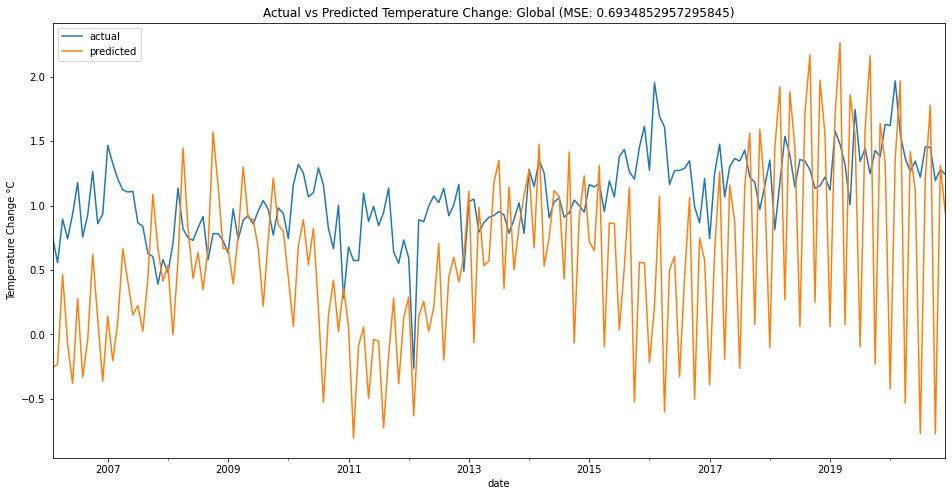

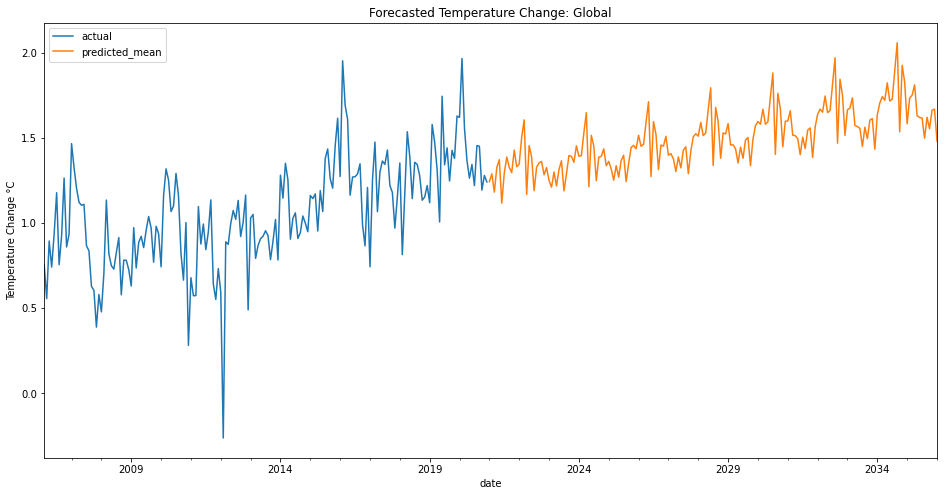

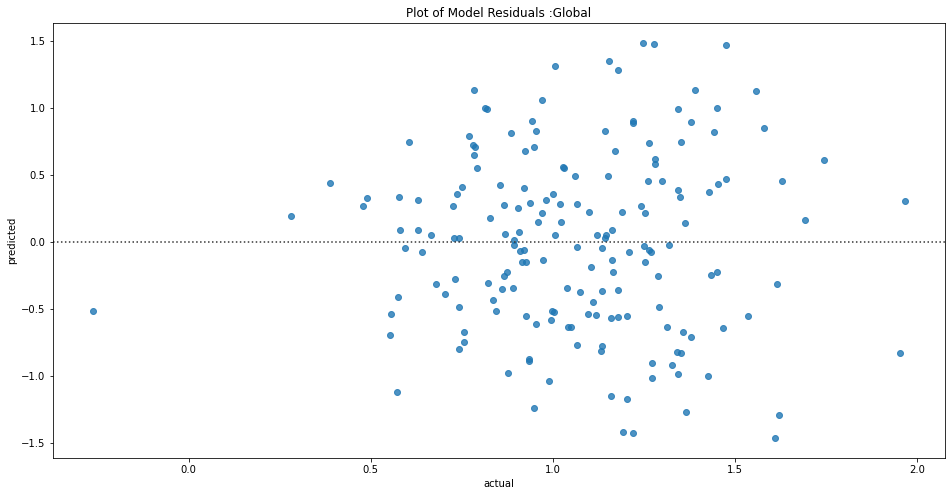

In [75]:
sarimax_model('Global',25)

The model  on the Global data and using S as 25 is doing the prediction with  RMSE = 0.32 for the global data.
For the forecasting , it is picking up the increasing trend and seasonality of the data.


C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive pa

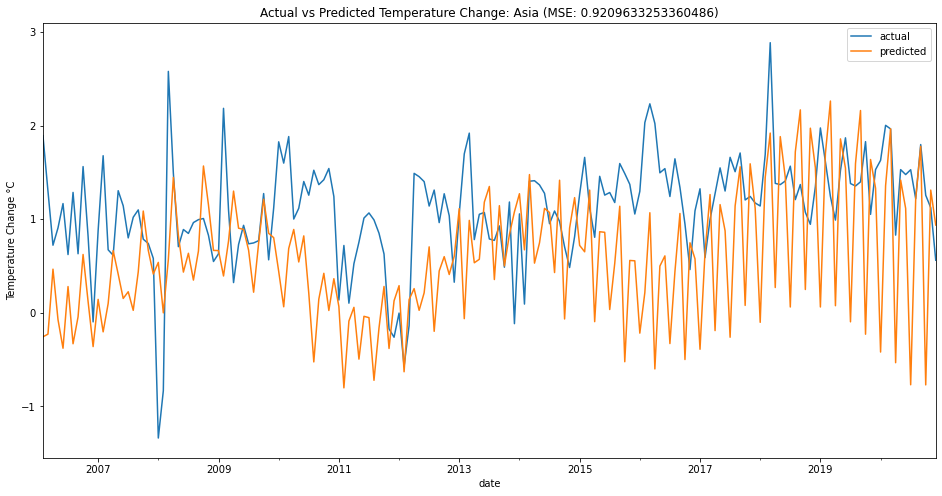

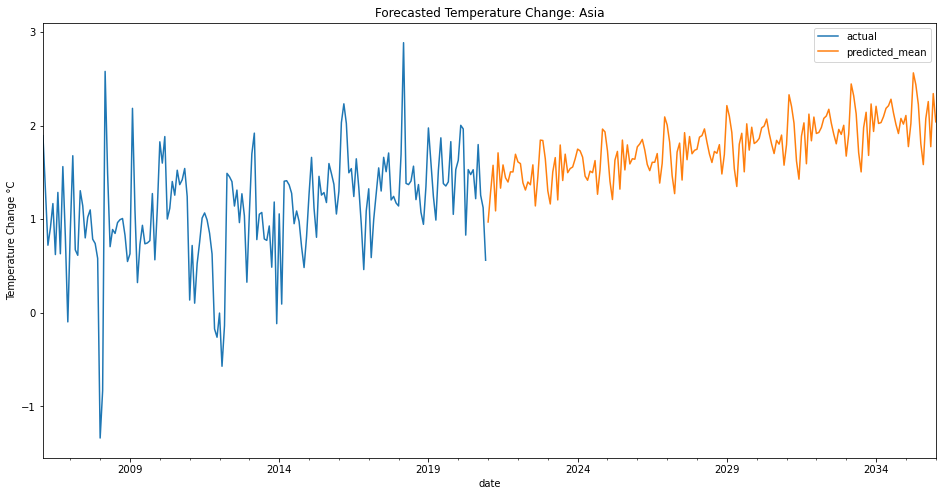

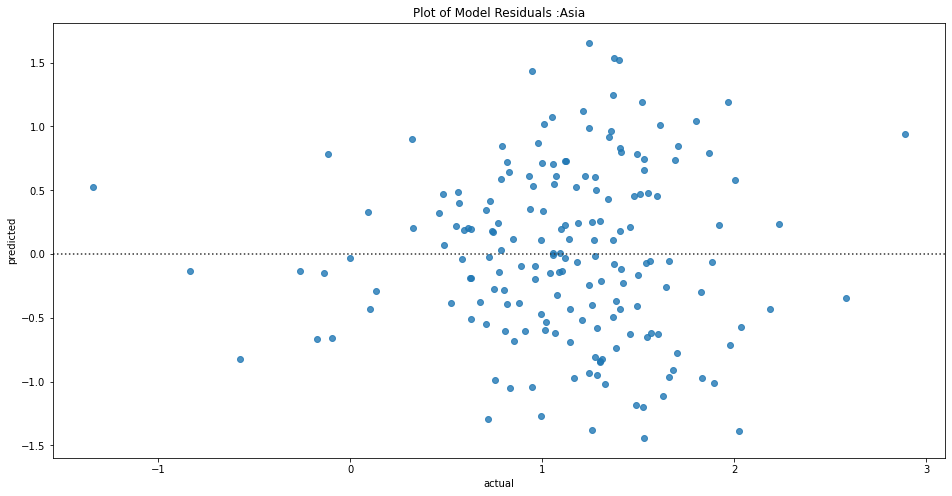

In [77]:
sarimax_model('Asia',25)

The model on the Asia region and using S = 25 is doing the prediction with  RMSE =0.61  for the Asia region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving 

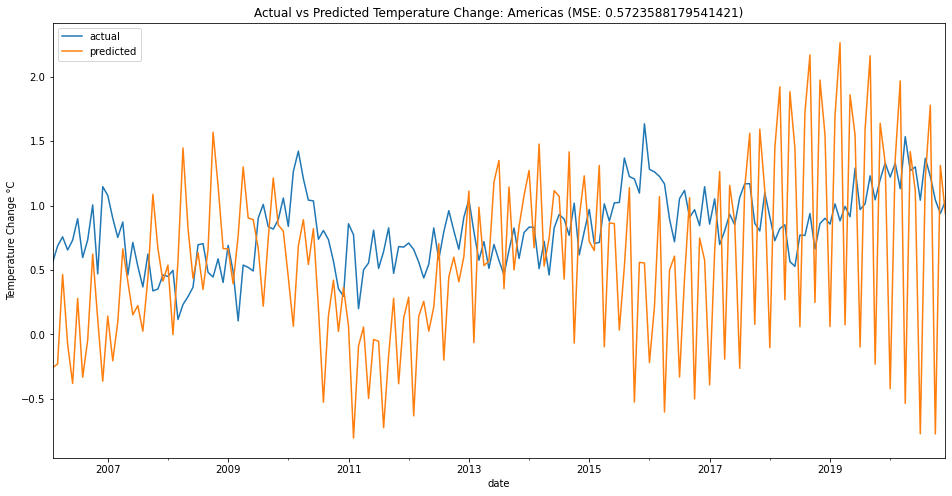

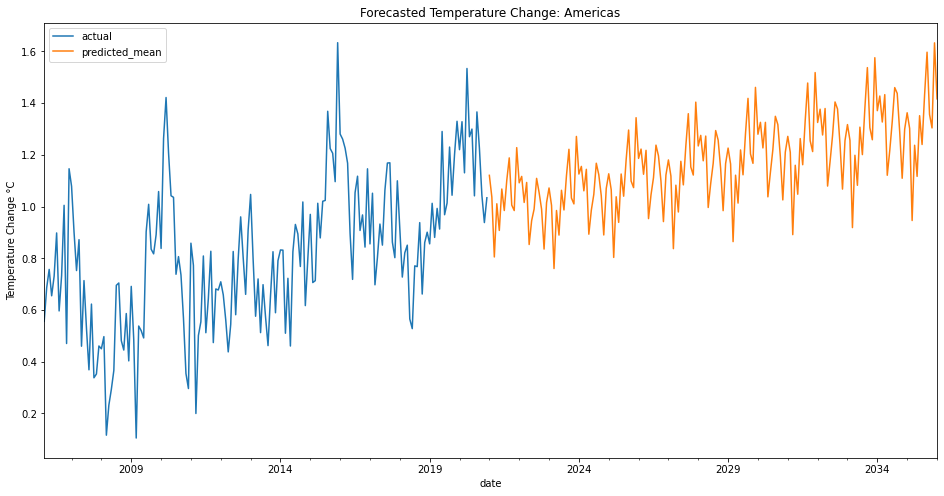

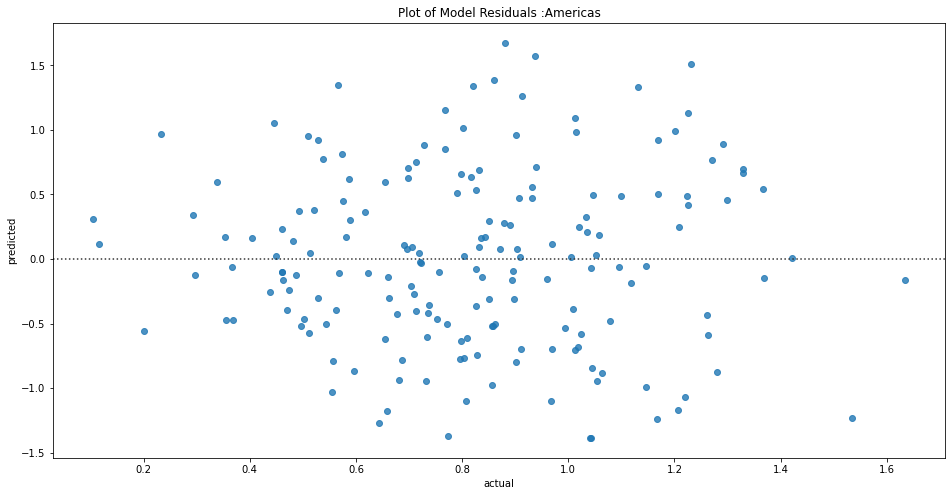

In [64]:
sarimax_model('Americas',25)

The model on the Americaa region and using S = 25 is doing the prediction with  RMSE =0.27  for the America region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


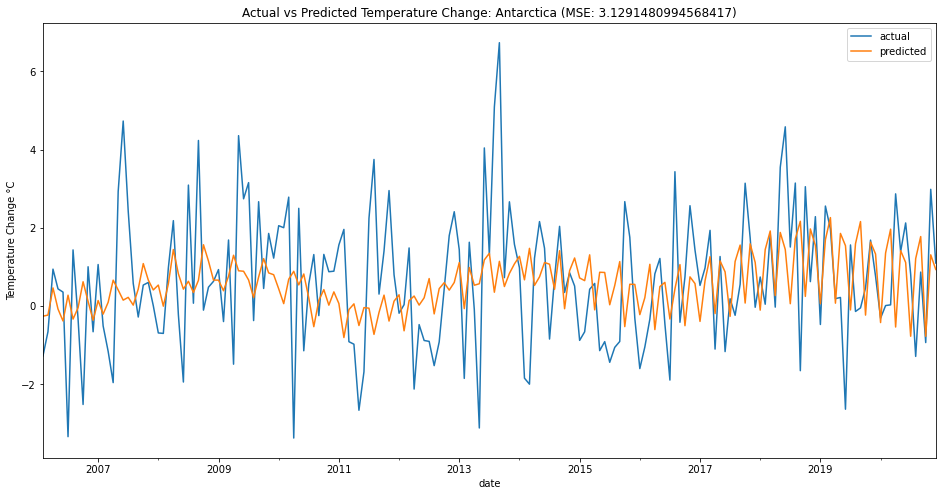

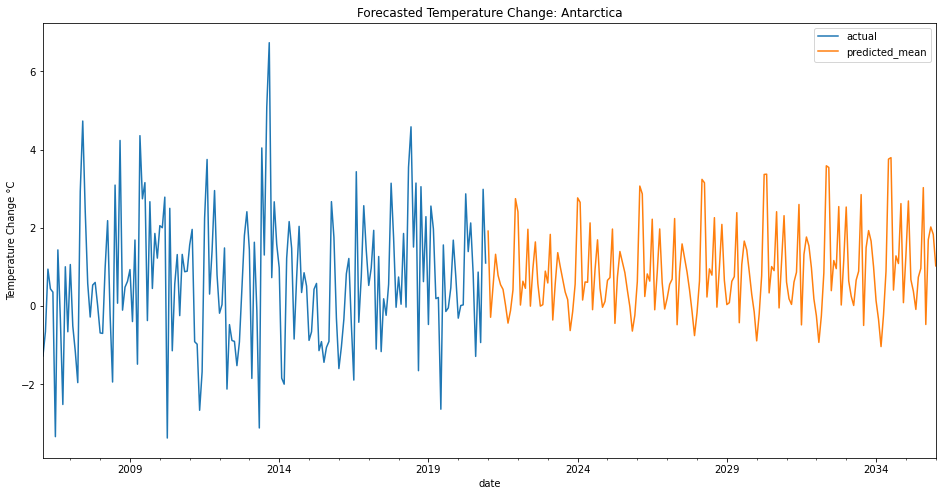

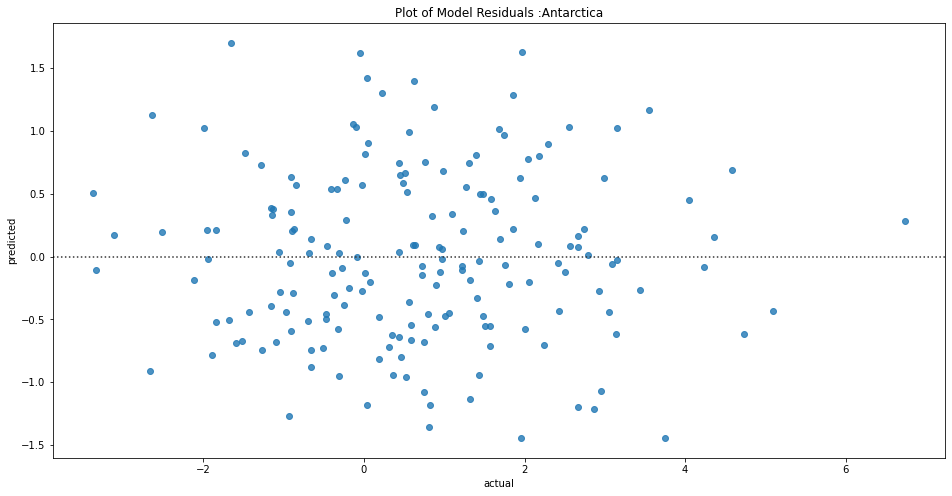

In [65]:
sarimax_model('Antarctica',25)

The model on the Antratica region and using S = 25 is doing the prediction with  RMSE =2.30  for the Antratica region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

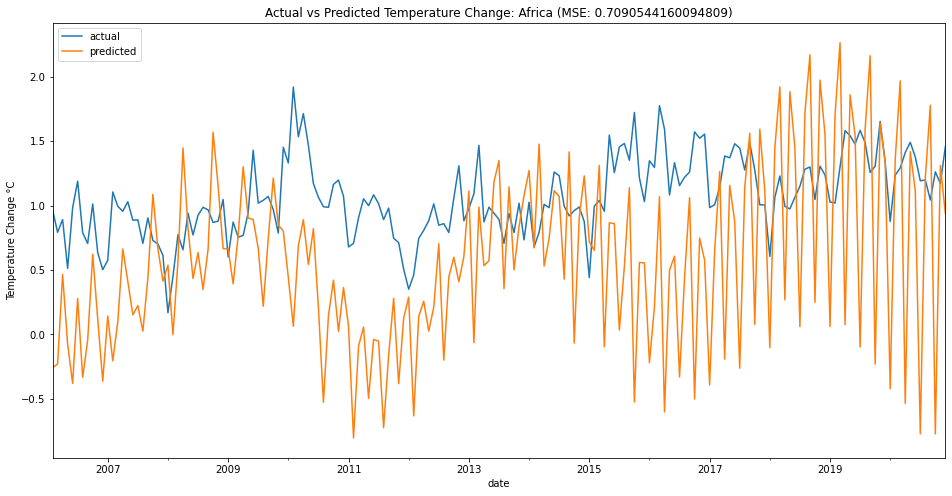

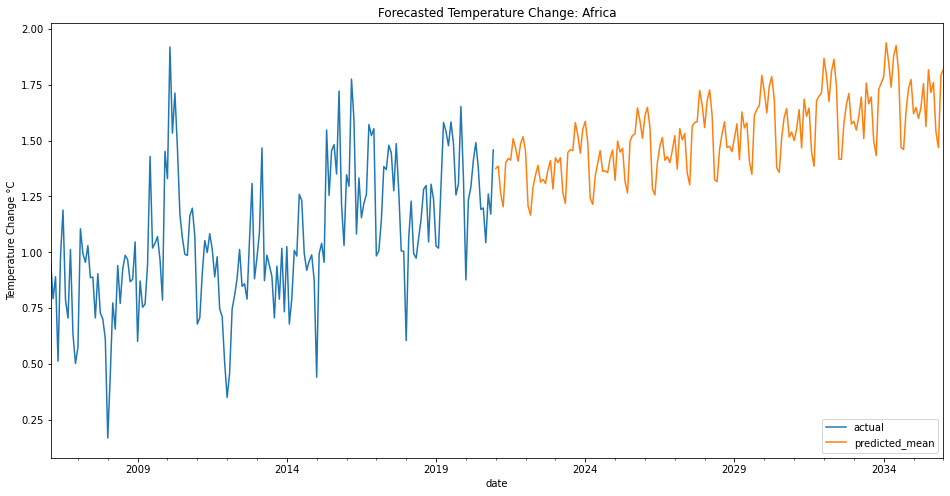

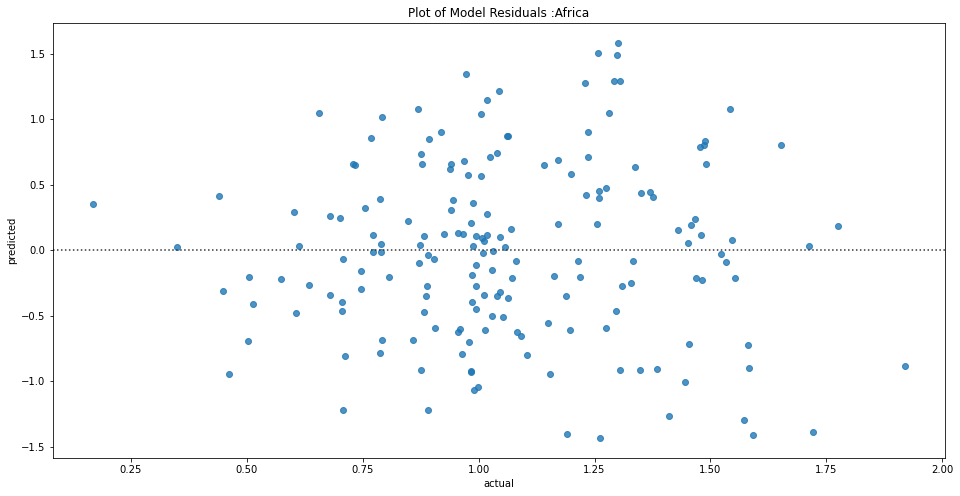

In [66]:
sarimax_model('Africa',23);

The model on the Africa region and using S = 25 is doing the prediction with  RMSE =0.38 for the Africa region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to conv

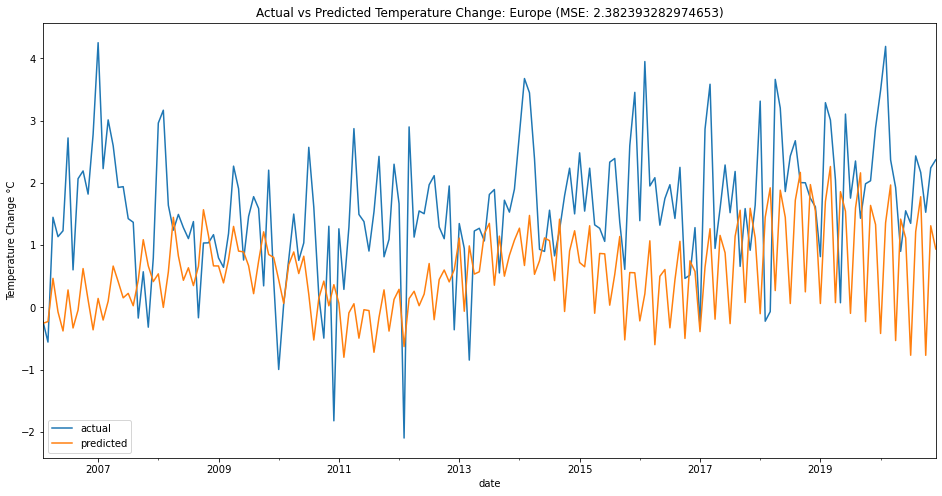

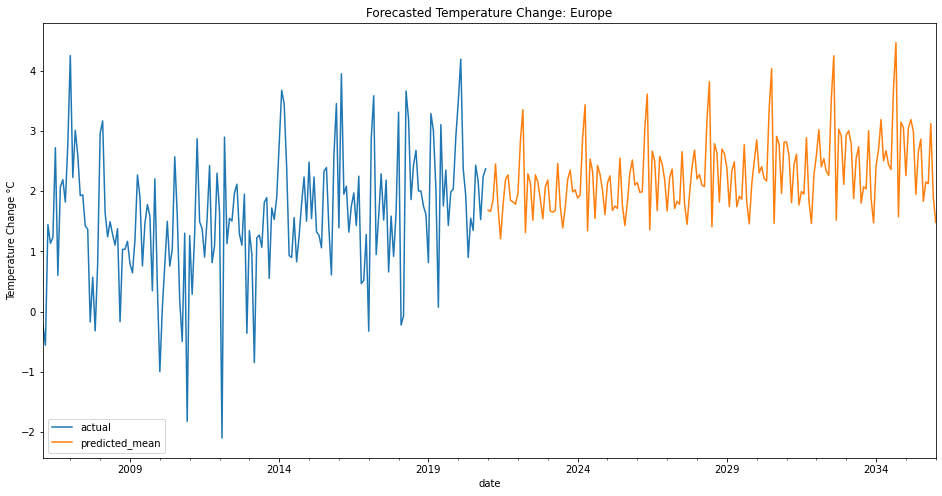

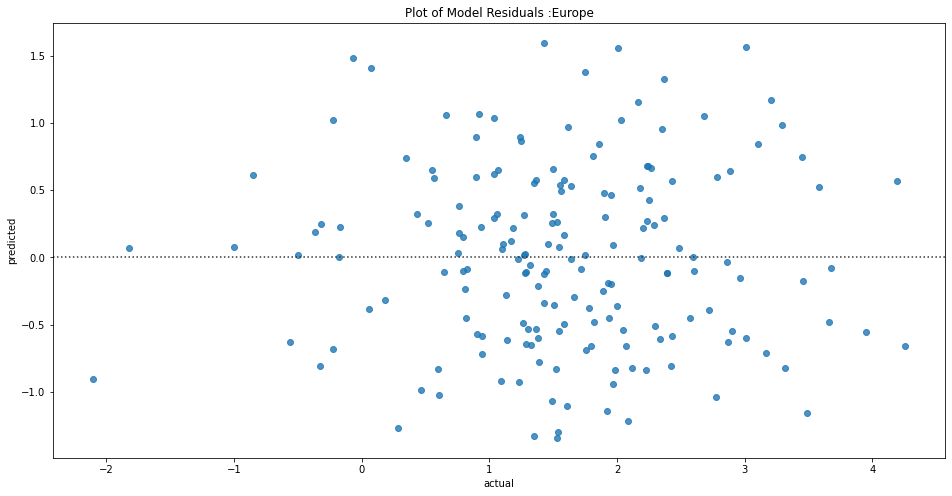

In [67]:
sarimax_model('Europe',25);

The model on the Europe region and using S = 25 is doing the prediction with  RMSE =1.26  for the  Europe region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to conv

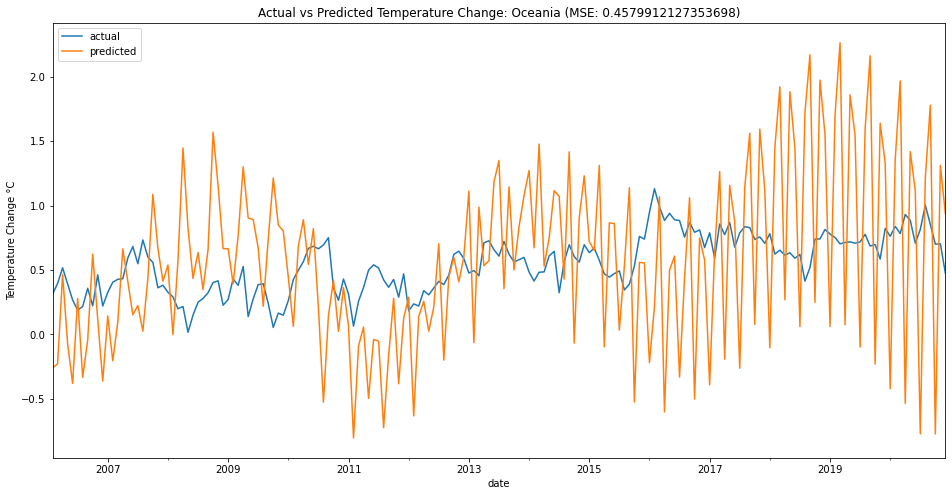

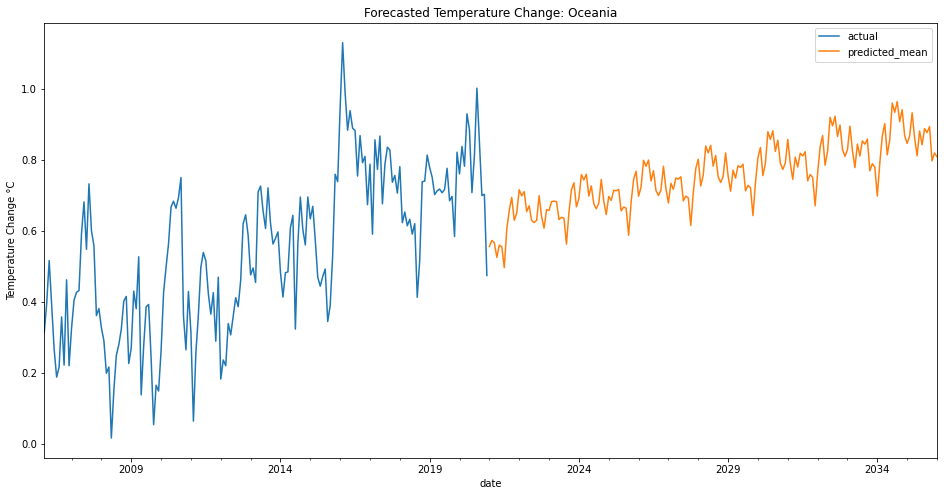

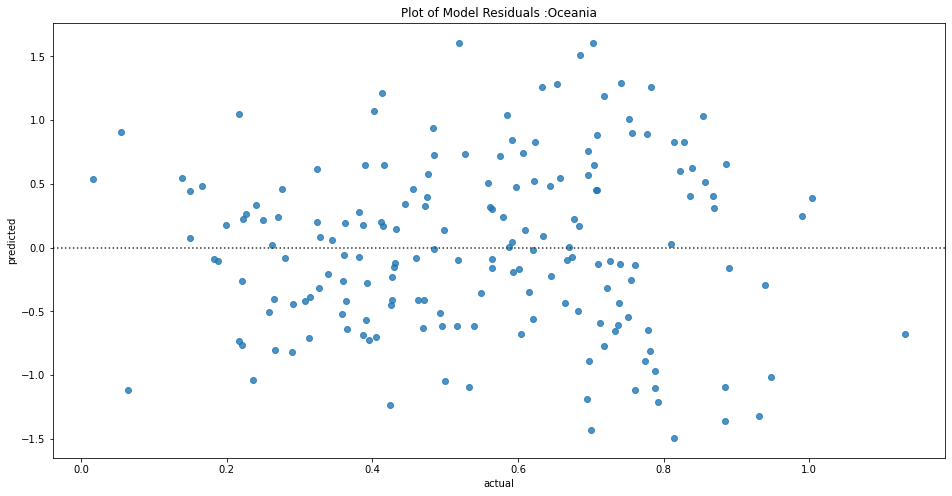

In [68]:
sarimax_model('Oceania',25)

The model on the Oceania region and using S = 25 is doing the prediction with  RMSE =0.2  for the Oceania region.
For the forecasting , it is picking up the increasing trend and seasonality of the data.

## Conclusions and Recommendations

AS conclusion , the SARIMAX model we built is a starting point , It picked up the trend and  seasonality in the predictions and forecast.
To improve it we can look more on subregions and those regions with high RMSE  for outliers.
